<H1> Battle of the Neighbourhood

<H2> An exploration of the elderly care segmentation in the neighbourhood areas of Singapore

<H3> Data Loading and processing - neighbourhood area data

In [3]:
!pip install pykml


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 41 kB 212 kB/s  eta 0:00:01


In [5]:
# The code was removed by Watson Studio for sharing.

In [5]:
def load_string(fileobject):
    '''Load the file contents into a Python string'''
    text = fileobject.read()
    return text


In [6]:
#read URA 2019 planning areas/regions .kml into dataframe

from pykml import parser
import pandas as pd


from io import BytesIO

text = load_string(BytesIO(readrawdata))
#text

folder = parser.fromstring(text).Document.Folder


#filename='planning-boundary-area.kml'
#with open(filename) as f:
#    folder = parser.parse(f).getroot().Document.Folder


plnm=[]
plnr=[]

for pm in folder.Placemark:
    #plnm1=pm.name
    #plcs1=pm.Point.coordinates
    
    plnm1=pm.ExtendedData.SchemaData.SimpleData[0].text
    plnr1=pm.ExtendedData.SchemaData.SimpleData[3].text

    #print(plnm1.SimpleData[0].text)
    #print(plnm1.SimpleData[3].text)
    
    plnm.append(plnm1)
    plnr.append(plnr1)
    
db=pd.DataFrame()
db['area_name']=plnm
db['area_region']=plnr


db

,area_name,area_region
0,BUKIT MERAH,CENTRAL REGION
1,BUKIT PANJANG,WEST REGION
2,BUKIT TIMAH,CENTRAL REGION
3,CENTRAL WATER CATCHMENT,NORTH REGION
4,CHANGI,EAST REGION
5,CHOA CHU KANG,WEST REGION
6,CLEMENTI,WEST REGION
7,HOUGANG,NORTH-EAST REGION
8,JURONG EAST,WEST REGION
9,JURONG WEST,WEST REGION


In [7]:
# get coordinates of the neighbourhood areas

!pip install geopandas
!pip install geopy

import geopandas as gpd
import geopy as gpy


locator = gpy.Nominatim(user_agent='myGeocoder')
#location = locator.geocode('Ang Mo Kio, Singapore')

#print('Latitude = {}, Longitude = {}'.format(location.latitude, location.longitude))

sg_df = db
sg_df.head()

lat_area = []
long_area = []

for index, row in sg_df.iterrows():
    #print(row["area_name"], row["area_region"])
    location = locator.geocode(row["area_name"] + ', Singapore')
    #print('Latitude = {}, Longitude = {}'.format(location.latitude, location.longitude))
    lat_area.append(location.latitude)
    long_area.append(location.longitude)


sg_df['Latitude'] = lat_area
sg_df['Longitude'] = long_area

sg_df.head()

    
    

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 994 kB 20.2 MB/s eta 0:00:01
     |████████████████████████████████| 15.3 MB 21.1 MB/s eta 0:00:01
     |████████████████████████████████| 6.5 MB 5.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 39.1 MB/s eta 0:00:01
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/s

,area_name,area_region,Latitude,Longitude
0,BUKIT MERAH,CENTRAL REGION,1.270439,103.828318
1,BUKIT PANJANG,WEST REGION,1.379149,103.761413
2,BUKIT TIMAH,CENTRAL REGION,1.354690,103.776372
3,CENTRAL WATER CATCHMENT,NORTH REGION,1.375708,103.801743
4,CHANGI,EAST REGION,1.351080,103.990064


In [8]:


sg_df


#sg_df.shape


,area_name,area_region,Latitude,Longitude
0,BUKIT MERAH,CENTRAL REGION,1.270439,103.828318
1,BUKIT PANJANG,WEST REGION,1.379149,103.761413
2,BUKIT TIMAH,CENTRAL REGION,1.354690,103.776372
3,CENTRAL WATER CATCHMENT,NORTH REGION,1.375708,103.801743
4,CHANGI,EAST REGION,1.351080,103.990064
5,CHOA CHU KANG,WEST REGION,1.385317,103.744325
6,CLEMENTI,WEST REGION,1.315100,103.765231
7,HOUGANG,NORTH-EAST REGION,1.370801,103.892544
8,JURONG EAST,WEST REGION,1.333108,103.742294
9,JURONG WEST,WEST REGION,1.339636,103.707339


In [9]:
# saving dataframe to csv file, so as to reduce workload redundancy every revisit run

sg_df.to_csv (r'sg_area_dataframe.csv', header=True)

sg_df2 = pd.read_csv (r'sg_area_dataframe.csv', index_col=0)

sg_df2


,area_name,area_region,Latitude,Longitude
0,BUKIT MERAH,CENTRAL REGION,1.270439,103.828318
1,BUKIT PANJANG,WEST REGION,1.379149,103.761413
2,BUKIT TIMAH,CENTRAL REGION,1.354690,103.776372
3,CENTRAL WATER CATCHMENT,NORTH REGION,1.375708,103.801743
4,CHANGI,EAST REGION,1.351080,103.990064
5,CHOA CHU KANG,WEST REGION,1.385317,103.744325
6,CLEMENTI,WEST REGION,1.315100,103.765231
7,HOUGANG,NORTH-EAST REGION,1.370801,103.892544
8,JURONG EAST,WEST REGION,1.333108,103.742294
9,JURONG WEST,WEST REGION,1.339636,103.707339


<H3> Data Loading and processing - neighbourhood area demographics data

In [10]:
# The code was removed by Watson Studio for sharing.

200
[{'planning_area': 'Bukit Merah', 'pre_primary': 2200, 'primary': 8900, 'secondary': 5500, 'post_secondary': 2100, 'polytechnic': 2200, 'prof_qualification_diploma': 200, 'university': 2400, 'year': 2015}]
200
[{'planning_area': 'Bukit Panjang', 'pre_primary': 2500, 'primary': 10600, 'secondary': 8600, 'post_secondary': 2000, 'polytechnic': 4100, 'prof_qualification_diploma': 200, 'university': 3000, 'year': 2015}]
200
[{'planning_area': 'Bukit Timah', 'pre_primary': 1300, 'primary': 5300, 'secondary': 4200, 'post_secondary': 1600, 'polytechnic': 600, 'prof_qualification_diploma': 200, 'university': 2500, 'year': 2015}]
200
[{'planning_area': 'Central Water Catchment', 'pre_primary': 0, 'primary': 0, 'secondary': 0, 'post_secondary': 0, 'polytechnic': 0, 'prof_qualification_diploma': 0, 'university': 0, 'year': 2015}]
200
[{'planning_area': 'Changi', 'pre_primary': 0, 'primary': 0, 'secondary': 0, 'post_secondary': 0, 'polytechnic': 0, 'prof_qualification_diploma': 0, 'university':

In [11]:

edu_df2 = pd.io.json.json_normalize(edu_df[0])

edu_df2



/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,planning_area,pre_primary,primary,secondary,post_secondary,polytechnic,prof_qualification_diploma,university,year
0,Bukit Merah,2200,8900,5500,2100,2200,200,2400,2015
1,Bukit Panjang,2500,10600,8600,2000,4100,200,3000,2015
2,Bukit Timah,1300,5300,4200,1600,600,200,2500,2015
3,Central Water Catchment,0,0,0,0,0,0,0,2015
4,Changi,0,0,0,0,0,0,0,2015
5,Choa Chu Kang,2400,12600,12200,3300,5500,600,5000,2015
6,Clementi,1500,5300,3100,900,900,200,1700,2015
7,Hougang,2600,13500,13000,3000,5000,500,6100,2015
8,Jurong East,800,6200,3600,1300,1200,200,1800,2015
9,Jurong West,5000,21700,17000,5000,6000,500,5600,2015


In [12]:
# saving dataframe to csv file, so as to reduce workload redundancy every revisit run
# onemap token has expiry date, no need to reapply again

edu_df2.to_csv (r'sg_area_edu_dataframe.csv', header=True)

edu_df3 = pd.read_csv (r'sg_area_edu_dataframe.csv', index_col=0)

edu_df3

,planning_area,pre_primary,primary,secondary,post_secondary,polytechnic,prof_qualification_diploma,university,year
0,Bukit Merah,2200,8900,5500,2100,2200,200,2400,2015
1,Bukit Panjang,2500,10600,8600,2000,4100,200,3000,2015
2,Bukit Timah,1300,5300,4200,1600,600,200,2500,2015
3,Central Water Catchment,0,0,0,0,0,0,0,2015
4,Changi,0,0,0,0,0,0,0,2015
5,Choa Chu Kang,2400,12600,12200,3300,5500,600,5000,2015
6,Clementi,1500,5300,3100,900,900,200,1700,2015
7,Hougang,2600,13500,13000,3000,5000,500,6100,2015
8,Jurong East,800,6200,3600,1300,1200,200,1800,2015
9,Jurong West,5000,21700,17000,5000,6000,500,5600,2015


In [13]:
    x = requests.get('https://developers.onemap.sg/privateapi/popapi/getPlanningareaNames?token='+TOKEN+'&year='+str(YEAR))
    print(x.status_code)
    print(x.json())
    
    plan_areas_df = pd.DataFrame(x.json())
    plan_areas_df
    

200
[{'id': 2, 'pln_area_n': 'ANG MO KIO'}, {'id': 3, 'pln_area_n': 'BEDOK'}, {'id': 4, 'pln_area_n': 'BISHAN'}, {'id': 5, 'pln_area_n': 'BOON LAY'}, {'id': 6, 'pln_area_n': 'BUKIT BATOK'}, {'id': 7, 'pln_area_n': 'BUKIT MERAH'}, {'id': 15, 'pln_area_n': 'CHOA CHU KANG'}, {'id': 8, 'pln_area_n': 'BUKIT PANJANG'}, {'id': 9, 'pln_area_n': 'JURONG EAST'}, {'id': 21, 'pln_area_n': 'QUEENSTOWN'}, {'id': 10, 'pln_area_n': 'JURONG WEST'}, {'id': 11, 'pln_area_n': 'BUKIT TIMAH'}, {'id': 12, 'pln_area_n': 'CENTRAL WATER CATCHMENT'}, {'id': 13, 'pln_area_n': 'CHANGI'}, {'id': 14, 'pln_area_n': 'CHANGI BAY'}, {'id': 31, 'pln_area_n': 'TENGAH'}, {'id': 16, 'pln_area_n': 'CLEMENTI'}, {'id': 17, 'pln_area_n': 'GEYLANG'}, {'id': 18, 'pln_area_n': 'HOUGANG'}, {'id': 19, 'pln_area_n': 'PIONEER'}, {'id': 20, 'pln_area_n': 'PUNGGOL'}, {'id': 22, 'pln_area_n': 'SELETAR'}, {'id': 23, 'pln_area_n': 'SEMBAWANG'}, {'id': 24, 'pln_area_n': 'SENGKANG'}, {'id': 25, 'pln_area_n': 'SERANGOON'}, {'id': 26, 'pln_are

,id,pln_area_n
0,2,ANG MO KIO
1,3,BEDOK
2,4,BISHAN
3,5,BOON LAY
4,6,BUKIT BATOK
5,7,BUKIT MERAH
6,15,CHOA CHU KANG
7,8,BUKIT PANJANG
8,9,JURONG EAST
9,21,QUEENSTOWN


In [14]:
# saving dataframe to csv file, so as to reduce workload redundancy every revisit run
# onemap token has expiry date, no need to reapply again

plan_areas_df.to_csv (r'sg_plan_areas_dataframe.csv', header=True)

plan_areas_df2 = pd.read_csv (r'sg_plan_areas_dataframe.csv', index_col=0)

plan_areas_df2

,id,pln_area_n
0,2,ANG MO KIO
1,3,BEDOK
2,4,BISHAN
3,5,BOON LAY
4,6,BUKIT BATOK
5,7,BUKIT MERAH
6,15,CHOA CHU KANG
7,8,BUKIT PANJANG
8,9,JURONG EAST
9,21,QUEENSTOWN


In [15]:
#get stats on household income

house_income_list=[]

for index, row in sg_df.iterrows():

    planArea = row["area_name"]

    x = requests.get('https://developers.onemap.sg/privateapi/popapi/getHouseholdMonthlyIncomeWork?token='+TOKEN+'&planningArea='+planArea+'&year='+str(YEAR))
    print(x.status_code)
    print(x.json())
    #temp_list = x.json()
    
    house_income_list.append(x.json())
    
    
house_income_df = pd.DataFrame(house_income_list)




200
[{'planning_area': 'Bukit Merah', 'total': 55200, 'below_sgd_1000': 2100, 'no_working_person': 10800, 'sgd_10000_over': None, 'sgd_10000_to_10999': 1700, 'sgd_11000_to_11999': 1400, 'sgd_1000_to_1999': 6100, 'sgd_12000_to_12999': 1600, 'sgd_13000_to_13999': 1400, 'sgd_14000_to_14999': 1700, 'sgd_15000_to_17499': 2300, 'sgd_17500_to_19999': 1600, 'sgd_20000_over': 5400, 'sgd_2000_to_2999': 3600, 'sgd_3000_to_3999': 2700, 'sgd_4000_to_4999': 2700, 'sgd_5000_to_5999': 2100, 'sgd_6000_to_6999': 2200, 'sgd_7000_to_7999': 2300, 'sgd_8000_over': None, 'sgd_8000_to_8999': 1600, 'sgd_9000_to_9999': 1800, 'year': 2015}]
200
[{'planning_area': 'Bukit Panjang', 'total': 41200, 'below_sgd_1000': 500, 'no_working_person': 2300, 'sgd_10000_over': None, 'sgd_10000_to_10999': 2300, 'sgd_11000_to_11999': 1500, 'sgd_1000_to_1999': 1700, 'sgd_12000_to_12999': 1800, 'sgd_13000_to_13999': 1800, 'sgd_14000_to_14999': 1200, 'sgd_15000_to_17499': 2200, 'sgd_17500_to_19999': 1600, 'sgd_20000_over': 4400, 's

In [16]:
house_income_df

house_income_df2 = house_income_df[house_income_df[0] != 'Result']
house_income_df2 



,0
0,"{'planning_area': 'Bukit Merah', 'total': 5520..."
1,"{'planning_area': 'Bukit Panjang', 'total': 41..."
2,"{'planning_area': 'Bukit Timah', 'total': 2390..."
5,"{'planning_area': 'Choa Chu Kang', 'total': 49..."
6,"{'planning_area': 'Clementi', 'total': 30100, ..."
7,"{'planning_area': 'Hougang', 'total': 64300, '..."
8,"{'planning_area': 'Jurong East', 'total': 2550..."
9,"{'planning_area': 'Jurong West', 'total': 8160..."
10,"{'planning_area': 'Kallang', 'total': 36500, '..."
14,"{'planning_area': 'Novena', 'total': 15700, 'b..."


In [17]:
house_income_df3 = pd.io.json.json_normalize(house_income_df2[0])
house_income_df3 



/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,planning_area,total,below_sgd_1000,no_working_person,sgd_10000_over,sgd_10000_to_10999,sgd_11000_to_11999,sgd_1000_to_1999,sgd_12000_to_12999,sgd_13000_to_13999,...,sgd_2000_to_2999,sgd_3000_to_3999,sgd_4000_to_4999,sgd_5000_to_5999,sgd_6000_to_6999,sgd_7000_to_7999,sgd_8000_over,sgd_8000_to_8999,sgd_9000_to_9999,year
0,Bukit Merah,55200,2100,10800,None,1700,1400,6100,1600,1400,...,3600,2700,2700,2100,2200,2300,None,1600,1800,2015
1,Bukit Panjang,41200,500,2300,None,2300,1500,1700,1800,1800,...,2200,2300,2400,2400,2900,2900,None,2500,2400,2015
2,Bukit Timah,23900,300,2900,None,900,400,700,700,400,...,400,400,200,300,300,700,None,700,200,2015
3,Choa Chu Kang,49300,600,2400,None,2500,2300,2000,1600,2100,...,3100,2900,2800,3000,2800,2600,None,3300,3200,2015
4,Clementi,30100,800,3900,None,1100,1000,1900,800,700,...,1600,1600,1700,1700,1700,1200,None,1500,1200,2015
5,Hougang,64300,1400,5400,None,2700,2300,3100,2300,1900,...,4300,4400,4100,3600,4200,3700,None,3800,2800,2015
6,Jurong East,25500,200,2800,None,1200,900,1000,1200,400,...,2000,1600,1700,1500,1500,1600,None,1100,1400,2015
7,Jurong West,81600,1200,5600,None,3400,4100,4800,3200,3600,...,4200,5100,5400,4600,5600,6000,None,5400,5000,2015
8,Kallang,36500,1200,4800,None,1600,1500,2800,1300,1100,...,2500,2600,1800,1600,2200,1600,None,1600,1200,2015
9,Novena,15700,100,1900,None,800,300,800,600,500,...,700,500,700,900,700,500,None,500,400,2015


In [18]:
# saving dataframe to csv file, so as to reduce workload redundancy every revisit run
# onemap token has expiry date, no need to reapply again

house_income_df3.to_csv (r'sg_area_income_dataframe.csv', header=True)

house_income_df4 = pd.read_csv (r'sg_area_income_dataframe.csv', index_col=0)

house_income_df4

,planning_area,total,below_sgd_1000,no_working_person,sgd_10000_over,sgd_10000_to_10999,sgd_11000_to_11999,sgd_1000_to_1999,sgd_12000_to_12999,sgd_13000_to_13999,...,sgd_2000_to_2999,sgd_3000_to_3999,sgd_4000_to_4999,sgd_5000_to_5999,sgd_6000_to_6999,sgd_7000_to_7999,sgd_8000_over,sgd_8000_to_8999,sgd_9000_to_9999,year
0,Bukit Merah,55200,2100,10800,NaN,1700,1400,6100,1600,1400,...,3600,2700,2700,2100,2200,2300,NaN,1600,1800,2015
1,Bukit Panjang,41200,500,2300,NaN,2300,1500,1700,1800,1800,...,2200,2300,2400,2400,2900,2900,NaN,2500,2400,2015
2,Bukit Timah,23900,300,2900,NaN,900,400,700,700,400,...,400,400,200,300,300,700,NaN,700,200,2015
3,Choa Chu Kang,49300,600,2400,NaN,2500,2300,2000,1600,2100,...,3100,2900,2800,3000,2800,2600,NaN,3300,3200,2015
4,Clementi,30100,800,3900,NaN,1100,1000,1900,800,700,...,1600,1600,1700,1700,1700,1200,NaN,1500,1200,2015
5,Hougang,64300,1400,5400,NaN,2700,2300,3100,2300,1900,...,4300,4400,4100,3600,4200,3700,NaN,3800,2800,2015
6,Jurong East,25500,200,2800,NaN,1200,900,1000,1200,400,...,2000,1600,1700,1500,1500,1600,NaN,1100,1400,2015
7,Jurong West,81600,1200,5600,NaN,3400,4100,4800,3200,3600,...,4200,5100,5400,4600,5600,6000,NaN,5400,5000,2015
8,Kallang,36500,1200,4800,NaN,1600,1500,2800,1300,1100,...,2500,2600,1800,1600,2200,1600,NaN,1600,1200,2015
9,Novena,15700,100,1900,NaN,800,300,800,600,500,...,700,500,700,900,700,500,NaN,500,400,2015


In [19]:
#get stats on age group

age_list=[]

for index, row in sg_df.iterrows():

    planArea = row["area_name"]

    x = requests.get('https://developers.onemap.sg/privateapi/popapi/getPopulationAgeGroup?token='+TOKEN+'&planningArea='+planArea+'&year='+str(YEAR))
    print(x.status_code)
    print(x.json())
    #temp_list = x.json()
    
    age_list.append(x.json())
    
    
age_df = pd.DataFrame(age_list)
age_df




200
[{'planning_area': 'Bukit Merah', 'age_0_4': 3530, 'age_5_9': 3720, 'age_10_14': 3220, 'age_15_19': 3440, 'age_20_24': 3870, 'age_25_29': 4810, 'age_30_34': 5860, 'age_35_39': 6760, 'age_40_44': 6470, 'age_45_49': 5540, 'age_50_54': 5530, 'age_55_59': 5780, 'age_60_64': 5700, 'age_65_69': 5440, 'age_70_74': 3580, 'age_75_79': 3110, 'age_80_84': 2070, 'age_85_over': 1980, 'total': 80390, 'gender': 'Female', 'year': 2015}, {'planning_area': 'Bukit Merah', 'age_0_4': 7210, 'age_5_9': 7480, 'age_10_14': 6640, 'age_15_19': 6860, 'age_20_24': 7700, 'age_25_29': 9340, 'age_30_34': 11070, 'age_35_39': 12840, 'age_40_44': 12730, 'age_45_49': 11320, 'age_50_54': 11320, 'age_55_59': 11740, 'age_60_64': 10920, 'age_65_69': 10030, 'age_70_74': 6480, 'age_75_79': 5590, 'age_80_84': 3540, 'age_85_over': 3010, 'total': 155840, 'gender': 'Total', 'year': 2015}, {'planning_area': 'Bukit Merah', 'age_0_4': 3680, 'age_5_9': 3760, 'age_10_14': 3420, 'age_15_19': 3430, 'age_20_24': 3830, 'age_25_29': 45

,0,1,2
0,"{'planning_area': 'Bukit Merah', 'age_0_4': 35...","{'planning_area': 'Bukit Merah', 'age_0_4': 72...","{'planning_area': 'Bukit Merah', 'age_0_4': 36..."
1,"{'planning_area': 'Bukit Panjang', 'age_0_4': ...","{'planning_area': 'Bukit Panjang', 'age_0_4': ...","{'planning_area': 'Bukit Panjang', 'age_0_4': ..."
2,"{'planning_area': 'Bukit Timah', 'age_0_4': 31...","{'planning_area': 'Bukit Timah', 'age_0_4': 15...","{'planning_area': 'Bukit Timah', 'age_0_4': 16..."
3,"{'planning_area': 'Central Water Catchment', '...","{'planning_area': 'Central Water Catchment', '...","{'planning_area': 'Central Water Catchment', '..."
4,"{'planning_area': 'Changi', 'age_0_4': 180, 'a...","{'planning_area': 'Changi', 'age_0_4': 100, 'a...","{'planning_area': 'Changi', 'age_0_4': 90, 'ag..."
5,"{'planning_area': 'Choa Chu Kang', 'age_0_4': ...","{'planning_area': 'Choa Chu Kang', 'age_0_4': ...","{'planning_area': 'Choa Chu Kang', 'age_0_4': ..."
6,"{'planning_area': 'Clementi', 'age_0_4': 3910,...","{'planning_area': 'Clementi', 'age_0_4': 1970,...","{'planning_area': 'Clementi', 'age_0_4': 1940,..."
7,"{'planning_area': 'Hougang', 'age_0_4': 8390, ...","{'planning_area': 'Hougang', 'age_0_4': 4110, ...","{'planning_area': 'Hougang', 'age_0_4': 4280, ..."
8,"{'planning_area': 'Jurong East', 'age_0_4': 32...","{'planning_area': 'Jurong East', 'age_0_4': 16...","{'planning_area': 'Jurong East', 'age_0_4': 16..."
9,"{'planning_area': 'Jurong West', 'age_0_4': 13...","{'planning_area': 'Jurong West', 'age_0_4': 67...","{'planning_area': 'Jurong West', 'age_0_4': 68..."


In [21]:
age_df2 = pd.io.json.json_normalize(age_df[0])
age_df2 



/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,planning_area,age_0_4,age_5_9,age_10_14,age_15_19,age_20_24,age_25_29,age_30_34,age_35_39,age_40_44,...,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_over,total,gender,year
0,Bukit Merah,3530,3720,3220,3440,3870,4810,5860,6760,6470,...,5780,5700,5440,3580,3110,2070,1980,80390,Female,2015
1,Bukit Panjang,7330,7630,8460,9420,10400,10980,10690,10010,11180,...,10680,7880,5190,2740,2000,1290,1010,139030,Total,2015
2,Bukit Timah,3140,4660,4810,4820,4980,4310,3770,4940,6630,...,5330,4550,3930,2380,1880,1210,1000,74470,Total,2015
3,Central Water Catchment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,Total,2015
4,Changi,180,230,220,150,130,100,170,240,290,...,120,90,90,50,30,30,40,2530,Total,2015
5,Choa Chu Kang,3630,4840,5700,7670,7810,6080,5530,5670,6430,...,6830,4660,2830,1400,980,550,340,86990,Male,2015
6,Clementi,3910,4420,4480,4690,4850,5820,6630,7310,7600,...,6550,6630,6200,3350,2600,1480,1200,91630,Total,2015
7,Hougang,8390,10010,11670,14390,16830,16650,15010,14840,16700,...,19270,15060,10830,5970,4670,3050,2340,222310,Total,2015
8,Jurong East,3290,3880,4550,4970,5760,6570,6360,6070,6530,...,7020,6420,4760,2360,1690,1040,760,84980,Total,2015
9,Jurong West,13600,15900,16700,18020,19070,19930,22540,23410,23070,...,19100,15870,10820,5250,3550,2080,1410,272660,Total,2015


In [22]:
age_df3 = pd.io.json.json_normalize(age_df[1])
age_df3 

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,planning_area,age_0_4,age_5_9,age_10_14,age_15_19,age_20_24,age_25_29,age_30_34,age_35_39,age_40_44,...,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_over,total,gender,year
0,Bukit Merah,7210,7480,6640,6860,7700,9340,11070,12840,12730,...,11740,10920,10030,6480,5590,3540,3010,155840,Total,2015
1,Bukit Panjang,3780,3850,4340,4800,5350,5370,5280,4820,5410,...,5530,4020,2630,1280,890,520,320,69160,Male,2015
2,Bukit Timah,1520,2020,2250,2270,2320,1970,1680,2170,3050,...,2550,2210,1930,1140,850,560,370,34660,Male,2015
3,Central Water Catchment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Male,2015
4,Changi,100,120,110,80,70,50,70,120,150,...,60,60,50,30,10,10,10,1300,Male,2015
5,Choa Chu Kang,7170,9340,11380,14820,15230,11940,11540,11960,13710,...,12910,8830,5650,2990,2220,1430,1040,174330,Total,2015
6,Clementi,1970,2260,2260,2370,2420,2790,3180,3430,3650,...,3030,2890,2900,1610,1210,610,410,43870,Male,2015
7,Hougang,4110,5020,5700,6990,8240,8290,7770,7860,8590,...,9550,7390,5410,3150,2570,1850,1620,112750,Female,2015
8,Jurong East,1670,1970,2350,2560,2990,3300,3110,2900,3200,...,3450,3230,2390,1190,760,440,260,42270,Male,2015
9,Jurong West,6740,7780,8080,8830,9320,10100,11870,11750,11270,...,9350,7820,5210,2710,1870,1250,940,135110,Female,2015


In [24]:
age_df4 = pd.io.json.json_normalize(age_df[2])
age_df4 

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  if __name__ == '__main__':


,planning_area,age_0_4,age_5_9,age_10_14,age_15_19,age_20_24,age_25_29,age_30_34,age_35_39,age_40_44,...,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_over,total,gender,year
0,Bukit Merah,3680,3760,3420,3430,3830,4530,5210,6080,6260,...,5960,5230,4590,2910,2480,1470,1040,75450,Male,2015
1,Bukit Panjang,3550,3770,4120,4620,5050,5600,5410,5190,5770,...,5150,3860,2560,1460,1120,780,680,69870,Female,2015
2,Bukit Timah,1610,2640,2560,2550,2660,2340,2090,2770,3580,...,2780,2340,2010,1240,1030,660,630,39810,Female,2015
3,Central Water Catchment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Female,2015
4,Changi,90,110,100,70,70,60,100,130,140,...,50,40,40,30,10,20,20,1230,Female,2015
5,Choa Chu Kang,3530,4500,5680,7150,7420,5860,6010,6290,7280,...,6070,4180,2810,1600,1240,880,700,87340,Female,2015
6,Clementi,1940,2160,2220,2330,2430,3030,3450,3880,3940,...,3520,3740,3300,1740,1380,870,780,47760,Female,2015
7,Hougang,4280,4990,5980,7400,8590,8360,7240,6980,8120,...,9720,7670,5420,2810,2100,1200,720,109560,Male,2015
8,Jurong East,1620,1910,2200,2410,2770,3270,3260,3180,3330,...,3570,3190,2380,1170,930,600,500,42710,Female,2015
9,Jurong West,6860,8120,8620,9190,9750,9830,10670,11660,11800,...,9760,8050,5610,2540,1680,830,480,137560,Male,2015


In [25]:
# Stack the DataFrames on top of each other
age_df5 = pd.concat([age_df2, age_df3, age_df4], axis=0)
age_df5


,planning_area,age_0_4,age_5_9,age_10_14,age_15_19,age_20_24,age_25_29,age_30_34,age_35_39,age_40_44,...,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_over,total,gender,year
0,Bukit Merah,3530,3720,3220,3440,3870,4810,5860,6760,6470,...,5780,5700,5440,3580,3110,2070,1980,80390,Female,2015
1,Bukit Panjang,7330,7630,8460,9420,10400,10980,10690,10010,11180,...,10680,7880,5190,2740,2000,1290,1010,139030,Total,2015
2,Bukit Timah,3140,4660,4810,4820,4980,4310,3770,4940,6630,...,5330,4550,3930,2380,1880,1210,1000,74470,Total,2015
3,Central Water Catchment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10,Total,2015
4,Changi,180,230,220,150,130,100,170,240,290,...,120,90,90,50,30,30,40,2530,Total,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,Paya Lebar,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Male,2015
51,Western Islands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Female,2015
52,Western Water Catchment,20,20,30,20,110,50,30,40,50,...,20,10,0,10,0,10,30,500,Female,2015
53,Woodlands,5770,7030,8210,10210,9730,8920,9400,9680,11110,...,8010,5530,3880,2190,1710,1100,810,124380,Female,2015


In [26]:
age_df6 = age_df5.sort_values(by=['planning_area'], ascending=True)
age_df6



,planning_area,age_0_4,age_5_9,age_10_14,age_15_19,age_20_24,age_25_29,age_30_34,age_35_39,age_40_44,...,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_over,total,gender,year
18,Ang Mo Kio,3480,3880,4200,4730,5130,5380,5800,6180,6610,...,6680,6040,5240,3070,2340,1340,770,84220,Male,2015
18,Ang Mo Kio,6790,7660,8290,9320,10310,11170,12250,13070,13710,...,13800,12980,11050,6670,5140,3250,2300,174770,Total,2015
18,Ang Mo Kio,3310,3780,4090,4590,5180,5800,6450,6890,7100,...,7120,6940,5810,3600,2800,1910,1520,90550,Female,2015
19,Bedok,5930,6750,7460,8780,9830,9880,9200,9750,10860,...,11500,10010,8180,4430,3270,1920,1310,141220,Male,2015
19,Bedok,11690,13400,14750,16930,19450,19860,19270,20850,22520,...,23380,20590,16750,9310,7330,4760,4010,289750,Total,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,Woodlands,11960,14430,17000,21030,20050,17920,18460,18680,21110,...,16810,11640,7630,4060,3090,1890,1250,250290,Total,2015
53,Woodlands,5770,7030,8210,10210,9730,8920,9400,9680,11110,...,8010,5530,3880,2190,1710,1100,810,124380,Female,2015
54,Yishun,5250,5060,5410,6270,7380,8350,8350,7540,7480,...,7860,6250,4080,2110,1440,770,470,99990,Male,2015
54,Yishun,10230,9950,10440,12190,14650,17010,17040,15420,15110,...,15950,12310,8340,4430,3190,1940,1480,201970,Total,2015


In [27]:
# saving dataframe to csv file, so as to reduce workload redundancy every revisit run
# onemap token has expiry date, no need to reapply again

age_df6.to_csv (r'sg_area_age_dataframe.csv', header=True)

age_df7 = pd.read_csv (r'sg_area_age_dataframe.csv', index_col=0)

age_df7

,planning_area,age_0_4,age_5_9,age_10_14,age_15_19,age_20_24,age_25_29,age_30_34,age_35_39,age_40_44,...,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_over,total,gender,year
18,Ang Mo Kio,3480,3880,4200,4730,5130,5380,5800,6180,6610,...,6680,6040,5240,3070,2340,1340,770,84220,Male,2015
18,Ang Mo Kio,6790,7660,8290,9320,10310,11170,12250,13070,13710,...,13800,12980,11050,6670,5140,3250,2300,174770,Total,2015
18,Ang Mo Kio,3310,3780,4090,4590,5180,5800,6450,6890,7100,...,7120,6940,5810,3600,2800,1910,1520,90550,Female,2015
19,Bedok,5930,6750,7460,8780,9830,9880,9200,9750,10860,...,11500,10010,8180,4430,3270,1920,1310,141220,Male,2015
19,Bedok,11690,13400,14750,16930,19450,19860,19270,20850,22520,...,23380,20590,16750,9310,7330,4760,4010,289750,Total,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53,Woodlands,11960,14430,17000,21030,20050,17920,18460,18680,21110,...,16810,11640,7630,4060,3090,1890,1250,250290,Total,2015
53,Woodlands,5770,7030,8210,10210,9730,8920,9400,9680,11110,...,8010,5530,3880,2190,1710,1100,810,124380,Female,2015
54,Yishun,5250,5060,5410,6270,7380,8350,8350,7540,7480,...,7860,6250,4080,2110,1440,770,470,99990,Male,2015
54,Yishun,10230,9950,10440,12190,14650,17010,17040,15420,15110,...,15950,12310,8340,4430,3190,1940,1480,201970,Total,2015


<H3> Data Loading and processing - neighbourhood area elderly care facilities

In [28]:
#read the eldercare day care facilities data from AIC

import pandas as pd
import xlrd

body_2 = client_e91f050e22a3489bb52aef2ba7047a1d.get_object(Bucket='capstoneproject-donotdelete-pr-hj13c3uq2s4hoo',Key='aicElderCareClean.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body_2, "__iter__"): body_2.__iter__ = types.MethodType( __iter__, body_2 )

        
readrawdata2 = body_2.read()


In [29]:
from io import BytesIO


elder_daycare_df = pd.read_excel(BytesIO(readrawdata2), sheet_name="Sheet1")

elder_daycare_df.head()

#elder_daycare_df.tail()


,No,"Name, Address & Contact",Services,Area,UID
0,1.0,AWWA Dementia Day Care Centre,- Senior Care Centres,Ang Mo Kio,0
1,NaN,Blk 123 Ang Mo Kio Ave 6 #01-4035 Singapore 56...,NaN,Ang Mo Kio,0
2,NaN,Tel: 65119479 Fax: 64560497,NaN,Ang Mo Kio,0
3,2.0,Ren Ci @ Ang Mo Kio (Nursing Home),- Senior Care Centres,Ang Mo Kio,1
4,NaN,Blk 10 Ang Mo Kio Avenue 8 Singapore 567727,NaN,Ang Mo Kio,1


In [30]:
elder_activeCentre_df = pd.read_excel(BytesIO(readrawdata2), sheet_name="Sheet2")

elder_activeCentre_df.head()

elder_activeCentre_df.tail()

,No,"Name, Address & Contact",Services,Area,UID
502,NaN,Blk 162 Yishun Street 11 #01-270 Singapore 760162,NaN,Yishun,167
503,NaN,Tel: 6257 0540,NaN,Yishun,167
504,8.0,TOUCH Senior Activity Centre @ 436 Yishun,- Senior Activity Centre,Yishun,168
505,NaN,Blk 436 Yishun Avenue 11 #01-224 Singapore 760436,NaN,Yishun,168
506,NaN,Tel: 6481 4158,NaN,Yishun,168


In [31]:
elder_daycare_df

elder_daycare_df['Name, Address & Contact'] = elder_daycare_df['Name, Address & Contact'].fillna(' ').astype(str)
elder_daycare_df2 = elder_daycare_df.groupby("UID")
#.first()

elder_daycare_df3 = pd.DataFrame()
elder_daycare_df3['Name'] = elder_daycare_df.groupby("UID").nth(0)['Name, Address & Contact']
elder_daycare_df3['Address'] = elder_daycare_df.groupby("UID").nth(1)['Name, Address & Contact']
elder_daycare_df3['Contact'] = elder_daycare_df.groupby("UID").nth(2)['Name, Address & Contact']

elder_daycare_df3['Services'] = elder_daycare_df.groupby("UID").nth(0)['Services']
elder_daycare_df3['Area'] = elder_daycare_df.groupby("UID").nth(0)['Area']
elder_daycare_df3['Area'] = elder_daycare_df.groupby("UID").nth(0)['Area']


elder_daycare_df3.head(10)
elder_daycare_df3.tail(10)



,Name,Address,Contact,Services,Area
UID,,,,,
63,St Luke's Eldercare (Changkat Centre),Tampines Street 33 #01-438 Singapore 520350,Tel: 67899956 Fax: 6789 6295,- Senior Care Centres,Tampines
64,St Luke's Eldercare (Tampines Centre),Tampines Street 11 #01-13 Singapore 521101,Tel: 67867688 Fax: 67867689,- Senior Care Centres,Tampines
65,Care Corner Active Ageing Hub @ Toa Payoh West,Blk 131 Lor 1 Toa Payoh #01-01 Toa Payoh Crest...,Tel: 6264 0262 Fax: 62526295,- Senior Care Centres,Toa Payoh
66,NTUC Health Day Centre for Seniors (Toa Payoh),Blk 169 Toa Payoh Lorong 1 #01-1052 Singapore ...,Tel: 6258 9968 Fax: 6353 5921,- Senior Care Centres,Toa Payoh
67,Silver Circle (Toa Payoh),Blk 169 Toa Payoh Lorong 1 #01-1052 Singapore ...,Tel: 6258 9968 Fax: 6353 5921,- Senior Care Centres,Toa Payoh
68,NTUC Health Day Centre for Seniors (Kampung Ad...,Blk 676 Woodlands Drive 71 Kampung Admiralty S...,Tel: 6870 8500,- Senior Care Centres,Woodlands
69,Sree Narayana Mission Multi Service Centre @ Y...,Blk 12 Yishun Avenue 5 Singapore 768992,Tel: 67521785 Fax: 67529548,- Day Care Services,Yishun
70,St Luke's Eldercare (Chong Pang),Blk 113 Yishun Ring Road #01-457 Singapore 760113,Tel: 6481 5708 Fax: 6481 6453,- Senior Care Centres,Yishun
71,St Luke's Eldercare (Nee Soon Central),Blk 766 Yishun Ave 3 #01-295 Singapore 760766,Tel: 6759 9053 Fax: 6759 1296,- Senior Care Centres,Yishun


In [32]:
!pip install geopandas
!pip install geopy

import geopandas as gpd
import geopy as gpy

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [33]:
print(elder_daycare_df3["Address"][-6:])


UID
67    Blk 169 Toa Payoh Lorong 1 #01-1052 Singapore ...
68    Blk 676 Woodlands Drive 71 Kampung Admiralty S...
69              Blk 12 Yishun Avenue 5 Singapore 768992
70    Blk 113 Yishun Ring Road #01-457 Singapore 760113
71        Blk 766 Yishun Ave 3 #01-295 Singapore 760766
72     Blk 260 Yishun Street 22 #01-97 Singapore 760260
Name: Address, dtype: object


In [36]:
elder_daycare_df3.isnull().values.any()

elder_daycare_df3.isnull().sum()


#elder_daycare_df3

Name        0
Address     0
Contact     0
Services    0
Area        0
dtype: int64

In [35]:
#elder_daycare_df3[elder_daycare_df3['Services']==''].index
      
elder_daycare_df3[pd.isna(elder_daycare_df3['Services'])==True]

elder_daycare_df3.loc[33, 'Services'] = 'Senior Care Centres'


In [37]:
elder_daycare_df3

,Name,Address,Contact,Services,Area
UID,,,,,
0,AWWA Dementia Day Care Centre,Blk 123 Ang Mo Kio Ave 6 #01-4035 Singapore 56...,Tel: 65119479 Fax: 64560497,- Senior Care Centres,Ang Mo Kio
1,Ren Ci @ Ang Mo Kio (Nursing Home),Blk 10 Ang Mo Kio Avenue 8 Singapore 567727,Tel: 6355 6316,- Senior Care Centres,Ang Mo Kio
2,St Luke's Eldercare (Ang Mo Kio Polyclinic),Blk 21 Ang Mo Kio Central 2 #02-01 Ang Mo Kio ...,Tel: 62587045 Fax: 62587104,- Senior Care Centres,Ang Mo Kio
3,Sunlove Rehab Centre,Ang Mo Kio Ave 10 #01-1874 Singapore 560557,Tel: 64563364 Fax: 64562259,- Senior Care Centres,Ang Mo Kio
4,NTUC Health Day Centre for Seniors (Chai Chee),Blk 35 Chai Chee Street Level 2 Singapore 468984,Tel: 68128983,- Senior Care Centres,Bedok
...,...,...,...,...,...
68,NTUC Health Day Centre for Seniors (Kampung Ad...,Blk 676 Woodlands Drive 71 Kampung Admiralty S...,Tel: 6870 8500,- Senior Care Centres,Woodlands
69,Sree Narayana Mission Multi Service Centre @ Y...,Blk 12 Yishun Avenue 5 Singapore 768992,Tel: 67521785 Fax: 67529548,- Day Care Services,Yishun
70,St Luke's Eldercare (Chong Pang),Blk 113 Yishun Ring Road #01-457 Singapore 760113,Tel: 6481 5708 Fax: 6481 6453,- Senior Care Centres,Yishun


In [38]:
#update empty address , which falls into contact column

for index, row in elder_daycare_df3.iterrows():
    addrStr = row['Address']
    areaStr = row['Name']

    if not addrStr.strip() :
        print('New address from Contact = , under Area = '.format(row['Contact'], row['Area']))
        row['Address'] = row['Contact']

        
        
        

New address from Contact = , under Area = 
New address from Contact = , under Area = 
New address from Contact = , under Area = 
New address from Contact = , under Area = 
New address from Contact = , under Area = 


In [39]:
#get lat long of eldercare faciilties address


# get coordinates of area


locator = gpy.Nominatim(user_agent='myGeocoder')

lat_area_elder = []
long_area_elder = []

for index, row in elder_daycare_df3.iterrows():
    #print(row["area_name"], row["area_region"])
    postalCode = None
    postalCode = row["Address"][-6:]
    #if (postalCode is None) :
    #    postalCode = row["Contact"][-6:] #get from next column
    #print(postalCode)
   # if (postalCode is None) :
    #print('PostalCode is not available, UID = {}, Area = {}'.format(row["UID"], row["Area"]))
    #else :   
    #location = locator.geocode(postalCode + ', Singapore')
    location = locator.geocode(postalCode + ', '+ row['Area']+ ', Singapore')
    
    if location is not None:
        print('Postal Code= {}, Latitude = {}, Longitude = {}'.format(postalCode, location.latitude, location.longitude))
        lat_area_elder.append(location.latitude)
        long_area_elder.append(location.longitude)
    else:
        print('PostalCode is not available on locator, Name = {}, Area = {}'.format(row["Name"], row["Area"]))
        lat_area_elder.append(0)
        long_area_elder.append(0)

elder_daycare_df3['Latitude'] = lat_area_elder
elder_daycare_df3['Longitude'] = long_area_elder

elder_daycare_df3.head()



Postal Code= 560123, Latitude = 1.3700803, Longitude = 103.8495228
Postal Code= 567727, Latitude = 1.3608363983461895, Longitude = 103.8532582901598
Postal Code= 569666, Latitude = 1.3700803, Longitude = 103.8495228
Postal Code= 560557, Latitude = 1.3700803, Longitude = 103.8495228
Postal Code= 468984, Latitude = 1.328122107166044, Longitude = 103.9218209046921
Postal Code= 460091, Latitude = 1.3325321763741347, Longitude = 103.94038924159216
Postal Code= 460121, Latitude = 1.329595427015927, Longitude = 103.93885969581132
Postal Code= 460534, Latitude = 1.3330561201602178, Longitude = 103.92481317820247
Postal Code= 579804, Latitude = 1.3493283153736781, Longitude = 103.85353161713319
Postal Code= 570313, Latitude = 1.3509859, Longitude = 103.84825507492937
Postal Code= 667979, Latitude = 1.3631543272361901, Longitude = 103.76442310851978
Postal Code= 659251, Latitude = 1.3549650258003487, Longitude = 103.75155093769719
Postal Code= 650337, Latitude = 1.3633778916005845, Longitude = 1

,Name,Address,Contact,Services,Area,Latitude,Longitude
UID,,,,,,,
0,AWWA Dementia Day Care Centre,Blk 123 Ang Mo Kio Ave 6 #01-4035 Singapore 56...,Tel: 65119479 Fax: 64560497,- Senior Care Centres,Ang Mo Kio,1.370080,103.849523
1,Ren Ci @ Ang Mo Kio (Nursing Home),Blk 10 Ang Mo Kio Avenue 8 Singapore 567727,Tel: 6355 6316,- Senior Care Centres,Ang Mo Kio,1.360836,103.853258
2,St Luke's Eldercare (Ang Mo Kio Polyclinic),Blk 21 Ang Mo Kio Central 2 #02-01 Ang Mo Kio ...,Tel: 62587045 Fax: 62587104,- Senior Care Centres,Ang Mo Kio,1.370080,103.849523
3,Sunlove Rehab Centre,Ang Mo Kio Ave 10 #01-1874 Singapore 560557,Tel: 64563364 Fax: 64562259,- Senior Care Centres,Ang Mo Kio,1.370080,103.849523
4,NTUC Health Day Centre for Seniors (Chai Chee),Blk 35 Chai Chee Street Level 2 Singapore 468984,Tel: 68128983,- Senior Care Centres,Bedok,1.328122,103.921821


In [40]:
print(elder_daycare_df3[elder_daycare_df3['Latitude']==0]['Address'].str.strip().str[-6:])





UID
14    100092
16    090030
18    090033
50    507706
56    550264
57    550307
Name: Address, dtype: object


In [ ]:
#manual update for missing locator... using google map


14    100092
1.2766549720665894, 103.80773736634407


16    090030
1.2733760890034467, 103.82022453565477

18    090033
1.2748532553271195, 103.82214853565476

50    507706
1.3545818829306453, 103.96462557005044

56    550264
1.352672481611585, 103.87196470496573

57    550307
1.3549902846956767, 103.8672321328514


In [41]:


elder_daycare_df3.loc[14, 'Latitude'] = 1.2766549720665894
elder_daycare_df3.loc[14, 'Longitude'] = 103.80773736634407

elder_daycare_df3.loc[16, 'Latitude'] = 1.2733760890034467
elder_daycare_df3.loc[16, 'Longitude'] = 103.82022453565477

elder_daycare_df3.loc[18, 'Latitude'] = 1.2748532553271195
elder_daycare_df3.loc[18, 'Longitude'] = 103.82214853565476

elder_daycare_df3.loc[50, 'Latitude'] = 1.3545818829306453
elder_daycare_df3.loc[50, 'Longitude'] = 103.96462557005044

elder_daycare_df3.loc[56, 'Latitude'] = 1.352672481611585
elder_daycare_df3.loc[56, 'Longitude'] = 103.87196470496573

elder_daycare_df3.loc[57, 'Latitude'] = 1.3549902846956767
elder_daycare_df3.loc[57, 'Longitude'] = 103.8672321328514



In [42]:
print(elder_daycare_df3[elder_daycare_df3['Latitude']==0]['Address'].str.strip().str[-6:])


Series([], Name: Address, dtype: object)


In [43]:
elder_daycare_df3


,Name,Address,Contact,Services,Area,Latitude,Longitude
UID,,,,,,,
0,AWWA Dementia Day Care Centre,Blk 123 Ang Mo Kio Ave 6 #01-4035 Singapore 56...,Tel: 65119479 Fax: 64560497,- Senior Care Centres,Ang Mo Kio,1.370080,103.849523
1,Ren Ci @ Ang Mo Kio (Nursing Home),Blk 10 Ang Mo Kio Avenue 8 Singapore 567727,Tel: 6355 6316,- Senior Care Centres,Ang Mo Kio,1.360836,103.853258
2,St Luke's Eldercare (Ang Mo Kio Polyclinic),Blk 21 Ang Mo Kio Central 2 #02-01 Ang Mo Kio ...,Tel: 62587045 Fax: 62587104,- Senior Care Centres,Ang Mo Kio,1.370080,103.849523
3,Sunlove Rehab Centre,Ang Mo Kio Ave 10 #01-1874 Singapore 560557,Tel: 64563364 Fax: 64562259,- Senior Care Centres,Ang Mo Kio,1.370080,103.849523
4,NTUC Health Day Centre for Seniors (Chai Chee),Blk 35 Chai Chee Street Level 2 Singapore 468984,Tel: 68128983,- Senior Care Centres,Bedok,1.328122,103.921821
...,...,...,...,...,...,...,...
68,NTUC Health Day Centre for Seniors (Kampung Ad...,Blk 676 Woodlands Drive 71 Kampung Admiralty S...,Tel: 6870 8500,- Senior Care Centres,Woodlands,1.439810,103.800718
69,Sree Narayana Mission Multi Service Centre @ Y...,Blk 12 Yishun Avenue 5 Singapore 768992,Tel: 67521785 Fax: 67529548,- Day Care Services,Yishun,1.429384,103.835028
70,St Luke's Eldercare (Chong Pang),Blk 113 Yishun Ring Road #01-457 Singapore 760113,Tel: 6481 5708 Fax: 6481 6453,- Senior Care Centres,Yishun,1.429384,103.835028


In [44]:
# saving dataframe to csv file, so as to reduce workload redundancy every revisit run
# onemap token has expiry date, no need to reapply again

elder_daycare_df3.to_csv (r'sg_elder_daycare_dataframe.csv', header=True)

elder_daycare_df4 = pd.read_csv (r'sg_elder_daycare_dataframe.csv', index_col=0)

elder_daycare_df4

,Name,Address,Contact,Services,Area,Latitude,Longitude
UID,,,,,,,
0,AWWA Dementia Day Care Centre,Blk 123 Ang Mo Kio Ave 6 #01-4035 Singapore 56...,Tel: 65119479 Fax: 64560497,- Senior Care Centres,Ang Mo Kio,1.370080,103.849523
1,Ren Ci @ Ang Mo Kio (Nursing Home),Blk 10 Ang Mo Kio Avenue 8 Singapore 567727,Tel: 6355 6316,- Senior Care Centres,Ang Mo Kio,1.360836,103.853258
2,St Luke's Eldercare (Ang Mo Kio Polyclinic),Blk 21 Ang Mo Kio Central 2 #02-01 Ang Mo Kio ...,Tel: 62587045 Fax: 62587104,- Senior Care Centres,Ang Mo Kio,1.370080,103.849523
3,Sunlove Rehab Centre,Ang Mo Kio Ave 10 #01-1874 Singapore 560557,Tel: 64563364 Fax: 64562259,- Senior Care Centres,Ang Mo Kio,1.370080,103.849523
4,NTUC Health Day Centre for Seniors (Chai Chee),Blk 35 Chai Chee Street Level 2 Singapore 468984,Tel: 68128983,- Senior Care Centres,Bedok,1.328122,103.921821
...,...,...,...,...,...,...,...
68,NTUC Health Day Centre for Seniors (Kampung Ad...,Blk 676 Woodlands Drive 71 Kampung Admiralty S...,Tel: 6870 8500,- Senior Care Centres,Woodlands,1.439810,103.800718
69,Sree Narayana Mission Multi Service Centre @ Y...,Blk 12 Yishun Avenue 5 Singapore 768992,Tel: 67521785 Fax: 67529548,- Day Care Services,Yishun,1.429384,103.835028
70,St Luke's Eldercare (Chong Pang),Blk 113 Yishun Ring Road #01-457 Singapore 760113,Tel: 6481 5708 Fax: 6481 6453,- Senior Care Centres,Yishun,1.429384,103.835028


In [45]:
elder_activeCentre_df


,No,"Name, Address & Contact",Services,Area,UID
0,1.0,AWWA Senior Activity Centre,Senior Activity Centre,Ang Mo Kio,0
1,NaN,Blk 123 Ang Mo Kio Ave 6 #01-4011 Singapore 56...,NaN,Ang Mo Kio,0
2,NaN,Tel: 6454 5465 Fax: 6454 6292,NaN,Ang Mo Kio,0
3,2.0,Community Care Network Seniors Activity Centre...,Senior Activity Centre,Ang Mo Kio,1
4,NaN,Blk 420 Ang Mo Kio Ave 10 #01-1143 Singapore 5...,NaN,Ang Mo Kio,1
...,...,...,...,...,...
502,NaN,Blk 162 Yishun Street 11 #01-270 Singapore 760162,NaN,Yishun,167
503,NaN,Tel: 6257 0540,NaN,Yishun,167
504,8.0,TOUCH Senior Activity Centre @ 436 Yishun,- Senior Activity Centre,Yishun,168
505,NaN,Blk 436 Yishun Avenue 11 #01-224 Singapore 760436,NaN,Yishun,168


In [46]:

elder_activeCentre_df['Name, Address & Contact'] = elder_activeCentre_df['Name, Address & Contact'].fillna(' ').astype(str)
elder_activeCentre_df2 = elder_activeCentre_df.groupby("UID")


elder_activeCentre_df3 = pd.DataFrame()
elder_activeCentre_df3['Name'] = elder_activeCentre_df.groupby("UID").nth(0)['Name, Address & Contact']
elder_activeCentre_df3['Address'] = elder_activeCentre_df.groupby("UID").nth(1)['Name, Address & Contact']
elder_activeCentre_df3['Contact'] = elder_activeCentre_df.groupby("UID").nth(2)['Name, Address & Contact']

elder_activeCentre_df3['Services'] = elder_activeCentre_df.groupby("UID").nth(0)['Services']
elder_activeCentre_df3['Area'] = elder_activeCentre_df.groupby("UID").nth(0)['Area']



elder_activeCentre_df3.head(10)
#elder_activeCentre_df3.tail(10)


,Name,Address,Contact,Services,Area
UID,,,,,
0,AWWA Senior Activity Centre,Blk 123 Ang Mo Kio Ave 6 #01-4011 Singapore 56...,Tel: 6454 5465 Fax: 6454 6292,Senior Activity Centre,Ang Mo Kio
1,Community Care Network Seniors Activity Centre...,Blk 420 Ang Mo Kio Ave 10 #01-1143 Singapore 5...,Tel: 64535364 Fax: 64548177,Senior Activity Centre,Ang Mo Kio
2,COMNET Senior Activity Centre @ 469 Ang Mo Kio,Blk 469 Ang Mo Kio Ave 10 #01-940 Singapore 56...,Tel: 6451 0898 Fax: 64510547,Senior Activity Centre,Ang Mo Kio
3,COMNET Senior Activity Centre @ Cheng San,Blk 510 Ang Mo Kio Ave 8 #01-2556 Singapore 56...,Tel: 62511358,Senior Activity Centre,Ang Mo Kio
4,Cornerstone 3G Centre,,Blk 591A Ang Mo Kio St 51 #01-35 Singapore 561591,Senior Activity Centre,Ang Mo Kio
5,Lions Befrienders (Ang Mo Kio) Senior Activity...,Blk 318 Ang Mo Kio Avenue 1 #01-1453 Singapore...,Tel: 6681 4903 Fax: 6554 2621,Senior Activity Centre,Ang Mo Kio
6,MWS Senior Activity Centre (Kebun Baru),,Blk 180 Ang Mo Kio Ave 5 #01-2980 Singapore 56...,Senior Activity Centre,Ang Mo Kio
7,MWS Senior Activity Centre (Teck Ghee Vista),,Blk 307D Ang Mo Kio Ave 1 #01-01 Singapore 564307,Senior Activity Centre,Ang Mo Kio
8,THK Cluster Support @ Ang Mo Kio,Blk Blk 131 Yishun St 11 #01-235 Chong Pang So...,Tel: 6690 0110 Fax: 67546424,Senior Activity Centre,Ang Mo Kio


In [47]:
elder_activeCentre_df3.isnull().values.any()

elder_activeCentre_df3.isnull().sum()


Name        0
Address     0
Contact     0
Services    0
Area        0
dtype: int64

In [48]:
#update empty address , which falls into contact column

for index, row in elder_activeCentre_df3.iterrows():
    addrStr = row['Address']
    areaStr = row['Name']

    if not addrStr.strip() :
        print('New address from Contact = , under Area = '.format(row['Contact'], row['Area']))
        row['Address'] = row['Contact']

        

New address from Contact = , under Area = 
New address from Contact = , under Area = 
New address from Contact = , under Area = 
New address from Contact = , under Area = 
New address from Contact = , under Area = 
New address from Contact = , under Area = 
New address from Contact = , under Area = 
New address from Contact = , under Area = 
New address from Contact = , under Area = 
New address from Contact = , under Area = 
New address from Contact = , under Area = 
New address from Contact = , under Area = 
New address from Contact = , under Area = 
New address from Contact = , under Area = 
New address from Contact = , under Area = 
New address from Contact = , under Area = 
New address from Contact = , under Area = 
New address from Contact = , under Area = 
New address from Contact = , under Area = 
New address from Contact = , under Area = 
New address from Contact = , under Area = 
New address from Contact = , under Area = 
New address from Contact = , under Area = 
New address

In [49]:
elder_activeCentre_df3

,Name,Address,Contact,Services,Area
UID,,,,,
0,AWWA Senior Activity Centre,Blk 123 Ang Mo Kio Ave 6 #01-4011 Singapore 56...,Tel: 6454 5465 Fax: 6454 6292,Senior Activity Centre,Ang Mo Kio
1,Community Care Network Seniors Activity Centre...,Blk 420 Ang Mo Kio Ave 10 #01-1143 Singapore 5...,Tel: 64535364 Fax: 64548177,Senior Activity Centre,Ang Mo Kio
2,COMNET Senior Activity Centre @ 469 Ang Mo Kio,Blk 469 Ang Mo Kio Ave 10 #01-940 Singapore 56...,Tel: 6451 0898 Fax: 64510547,Senior Activity Centre,Ang Mo Kio
3,COMNET Senior Activity Centre @ Cheng San,Blk 510 Ang Mo Kio Ave 8 #01-2556 Singapore 56...,Tel: 62511358,Senior Activity Centre,Ang Mo Kio
4,Cornerstone 3G Centre,Blk 591A Ang Mo Kio St 51 #01-35 Singapore 561591,Blk 591A Ang Mo Kio St 51 #01-35 Singapore 561591,Senior Activity Centre,Ang Mo Kio
...,...,...,...,...,...
164,Pacific Activity Centre (Yishun Riverwalk),Blk 333B Yishun Street 31 #01-183 Singapore 76...,Tel: 62009383,- Senior Activity Centre,Yishun
165,SASCO@ Khatib,Blk 813 Yishun Ring Rd #01-01 Singapore 760813,Blk 813 Yishun Ring Rd #01-01 Singapore 760813,- Senior Activity Centre,Yishun
166,TOUCH Cluster Support @ Yishun,Blk 108 Yishun Ring Road #01-287 Singapore 760108,Tel: 6317 9981,- Senior Activity Centre (Cluster Support),Yishun


In [50]:
#get lat long of eldercare faciilties address


# get coordinates of area


locator = gpy.Nominatim(user_agent='myGeocoder')

lat_area_elder = []
long_area_elder = []

for index, row in elder_activeCentre_df3.iterrows():
    #print(row["area_name"], row["area_region"])
    postalCode = None
    postalCode = row["Address"][-6:]
    #if (postalCode is None) :
    #    postalCode = row["Contact"][-6:] #get from next column
    #print(postalCode)
   # if (postalCode is None) :
    #print('PostalCode is not available, UID = {}, Area = {}'.format(row["UID"], row["Area"]))
    #else :   
    #location = locator.geocode(postalCode + ', Singapore')
    location = locator.geocode(postalCode + ', '+ row['Area']+ ', Singapore')
    
    if location is not None:
        print('Postal Code= {}, Latitude = {}, Longitude = {}'.format(postalCode, location.latitude, location.longitude))
        lat_area_elder.append(location.latitude)
        long_area_elder.append(location.longitude)
    else:
        print('PostalCode is not available on locator, Name = {}, Area = {}'.format(row["Name"], row["Area"]))
        lat_area_elder.append(0)
        long_area_elder.append(0)

elder_activeCentre_df3['Latitude'] = lat_area_elder
elder_activeCentre_df3['Longitude'] = long_area_elder

elder_activeCentre_df3.head()


Postal Code= 560123, Latitude = 1.3700803, Longitude = 103.8495228
Postal Code= 560420, Latitude = 1.3651956925292401, Longitude = 103.85306412270829
Postal Code= 560469, Latitude = 1.3700803, Longitude = 103.8495228
Postal Code= 560510, Latitude = 1.3700803, Longitude = 103.8495228
Postal Code= 561591, Latitude = 1.3700803, Longitude = 103.8495228
Postal Code= 560318, Latitude = 1.3700803, Longitude = 103.8495228
Postal Code= 560180, Latitude = 1.3767146, Longitude = 103.8385975
Postal Code= 564307, Latitude = 1.3700803, Longitude = 103.8495228
Postal Code= 760131, Latitude = 1.3700803, Longitude = 103.8495228
Postal Code= 560208, Latitude = 1.3700803, Longitude = 103.8495228
Postal Code= 560257, Latitude = 1.3700803, Longitude = 103.8495228
Postal Code= 560645, Latitude = 1.3700803, Longitude = 103.8495228
Postal Code= 471609, Latitude = 1.3239765, Longitude = 103.930216
Postal Code= 461022, Latitude = 1.3252602952520418, Longitude = 103.92185242666821
Postal Code= 460544, Latitude =

,Name,Address,Contact,Services,Area,Latitude,Longitude
UID,,,,,,,
0,AWWA Senior Activity Centre,Blk 123 Ang Mo Kio Ave 6 #01-4011 Singapore 56...,Tel: 6454 5465 Fax: 6454 6292,Senior Activity Centre,Ang Mo Kio,1.370080,103.849523
1,Community Care Network Seniors Activity Centre...,Blk 420 Ang Mo Kio Ave 10 #01-1143 Singapore 5...,Tel: 64535364 Fax: 64548177,Senior Activity Centre,Ang Mo Kio,1.365196,103.853064
2,COMNET Senior Activity Centre @ 469 Ang Mo Kio,Blk 469 Ang Mo Kio Ave 10 #01-940 Singapore 56...,Tel: 6451 0898 Fax: 64510547,Senior Activity Centre,Ang Mo Kio,1.370080,103.849523
3,COMNET Senior Activity Centre @ Cheng San,Blk 510 Ang Mo Kio Ave 8 #01-2556 Singapore 56...,Tel: 62511358,Senior Activity Centre,Ang Mo Kio,1.370080,103.849523
4,Cornerstone 3G Centre,Blk 591A Ang Mo Kio St 51 #01-35 Singapore 561591,Blk 591A Ang Mo Kio St 51 #01-35 Singapore 561591,Senior Activity Centre,Ang Mo Kio,1.370080,103.849523


In [51]:
print(elder_activeCentre_df3[elder_activeCentre_df3['Latitude']==0]['Address'].str.strip().str[-6:])

#manual update for missing locator... using google map



UID
31     161051
32     151117
33     151121
37     160105
39     151117
43     090041
45     160044
47     160044
50     090003
51     151123
55     590021
82     530019
83     530025
97     210047
98     200811
122    750513
Name: Address, dtype: object


In [ ]:
31     161051
1.290581965386476, 103.82758570496557

32     151117
1.2848654940814446, 103.82164728168868

33     151121
1.283629208050738, 103.82274007798247

37     160105
1.2809643285924848, 103.82504828168868

39     151117
1.284951303186165, 103.82149707798247

43     090041
1.271987803543036, 103.82277870496556

45     160044
1.289232443297353, 103.82642319703332

47     160044
1.289232443297353, 103.82642319703332

50     090003
1.2789924241729125, 103.81781782401634

51     151123
1.2846906600901606, 103.82323290867173

55     590021
1.3383459160873419, 103.77198107798266

82     530019
1.3640880103260256, 103.89179711237819

83     530025
1.3661258664553826, 103.89167428168895

97     210047
1.3152830825004018, 103.85005297798259

98     200811
1.308182389864576, 103.86123963936106

122    750513
1.4545428139781587, 103.8203828240168


In [52]:
elder_activeCentre_df3.loc[31, 'Latitude'] = 1.290581965386476 
elder_activeCentre_df3.loc[31, 'Longitude'] = 103.82758570496557

elder_activeCentre_df3.loc[32, 'Latitude'] = 1.2848654940814446 
elder_activeCentre_df3.loc[32, 'Longitude'] = 103.82164728168868

elder_activeCentre_df3.loc[33, 'Latitude'] = 1.283629208050738 
elder_activeCentre_df3.loc[33, 'Longitude'] = 103.82274007798247

elder_activeCentre_df3.loc[37, 'Latitude'] = 1.2809643285924848
elder_activeCentre_df3.loc[37, 'Longitude'] = 103.82504828168868

elder_activeCentre_df3.loc[39, 'Latitude'] = 1.284951303186165
elder_activeCentre_df3.loc[39, 'Longitude'] = 103.82149707798247

elder_activeCentre_df3.loc[43, 'Latitude'] = 1.271987803543036
elder_activeCentre_df3.loc[43, 'Longitude'] = 103.82277870496556

elder_activeCentre_df3.loc[45, 'Latitude'] = 1.289232443297353
elder_activeCentre_df3.loc[45, 'Longitude'] = 103.82642319703332

elder_activeCentre_df3.loc[47, 'Latitude'] = 1.289232443297353
elder_activeCentre_df3.loc[47, 'Longitude'] = 103.82642319703332

elder_activeCentre_df3.loc[50, 'Latitude'] = 1.2789924241729125
elder_activeCentre_df3.loc[50, 'Longitude'] = 103.81781782401634

elder_activeCentre_df3.loc[51, 'Latitude'] = 1.2846906600901606
elder_activeCentre_df3.loc[51, 'Longitude'] = 103.82323290867173

elder_activeCentre_df3.loc[55, 'Latitude'] = 1.3383459160873419
elder_activeCentre_df3.loc[55, 'Longitude'] = 103.77198107798266

elder_activeCentre_df3.loc[82, 'Latitude'] = 1.3640880103260256
elder_activeCentre_df3.loc[82, 'Longitude'] = 103.89179711237819

elder_activeCentre_df3.loc[83, 'Latitude'] = 1.3661258664553826
elder_activeCentre_df3.loc[83, 'Longitude'] = 103.89167428168895

elder_activeCentre_df3.loc[97, 'Latitude'] = 1.3152830825004018
elder_activeCentre_df3.loc[97, 'Longitude'] = 103.85005297798259

elder_activeCentre_df3.loc[98, 'Latitude'] = 1.308182389864576
elder_activeCentre_df3.loc[98, 'Longitude'] = 103.86123963936106

elder_activeCentre_df3.loc[122, 'Latitude'] = 1.4545428139781587
elder_activeCentre_df3.loc[122, 'Longitude'] = 103.8203828240168

In [53]:
print(elder_activeCentre_df3[elder_activeCentre_df3['Latitude']==0]['Address'].str.strip().str[-6:])


Series([], Name: Address, dtype: object)


In [54]:
elder_activeCentre_df3

,Name,Address,Contact,Services,Area,Latitude,Longitude
UID,,,,,,,
0,AWWA Senior Activity Centre,Blk 123 Ang Mo Kio Ave 6 #01-4011 Singapore 56...,Tel: 6454 5465 Fax: 6454 6292,Senior Activity Centre,Ang Mo Kio,1.370080,103.849523
1,Community Care Network Seniors Activity Centre...,Blk 420 Ang Mo Kio Ave 10 #01-1143 Singapore 5...,Tel: 64535364 Fax: 64548177,Senior Activity Centre,Ang Mo Kio,1.365196,103.853064
2,COMNET Senior Activity Centre @ 469 Ang Mo Kio,Blk 469 Ang Mo Kio Ave 10 #01-940 Singapore 56...,Tel: 6451 0898 Fax: 64510547,Senior Activity Centre,Ang Mo Kio,1.370080,103.849523
3,COMNET Senior Activity Centre @ Cheng San,Blk 510 Ang Mo Kio Ave 8 #01-2556 Singapore 56...,Tel: 62511358,Senior Activity Centre,Ang Mo Kio,1.370080,103.849523
4,Cornerstone 3G Centre,Blk 591A Ang Mo Kio St 51 #01-35 Singapore 561591,Blk 591A Ang Mo Kio St 51 #01-35 Singapore 561591,Senior Activity Centre,Ang Mo Kio,1.370080,103.849523
...,...,...,...,...,...,...,...
164,Pacific Activity Centre (Yishun Riverwalk),Blk 333B Yishun Street 31 #01-183 Singapore 76...,Tel: 62009383,- Senior Activity Centre,Yishun,1.431966,103.845380
165,SASCO@ Khatib,Blk 813 Yishun Ring Rd #01-01 Singapore 760813,Blk 813 Yishun Ring Rd #01-01 Singapore 760813,- Senior Activity Centre,Yishun,1.429384,103.835028
166,TOUCH Cluster Support @ Yishun,Blk 108 Yishun Ring Road #01-287 Singapore 760108,Tel: 6317 9981,- Senior Activity Centre (Cluster Support),Yishun,1.429384,103.835028


In [55]:
# saving dataframe to csv file, so as to reduce workload redundancy every revisit run
# onemap token has expiry date, no need to reapply again

elder_activeCentre_df3.to_csv (r'sg_elder_activeCentre_dataframe.csv', header=True)

elder_activeCentre_df4 = pd.read_csv (r'sg_elder_activeCentre_dataframe.csv', index_col=0)

elder_activeCentre_df4

,Name,Address,Contact,Services,Area,Latitude,Longitude
UID,,,,,,,
0,AWWA Senior Activity Centre,Blk 123 Ang Mo Kio Ave 6 #01-4011 Singapore 56...,Tel: 6454 5465 Fax: 6454 6292,Senior Activity Centre,Ang Mo Kio,1.370080,103.849523
1,Community Care Network Seniors Activity Centre...,Blk 420 Ang Mo Kio Ave 10 #01-1143 Singapore 5...,Tel: 64535364 Fax: 64548177,Senior Activity Centre,Ang Mo Kio,1.365196,103.853064
2,COMNET Senior Activity Centre @ 469 Ang Mo Kio,Blk 469 Ang Mo Kio Ave 10 #01-940 Singapore 56...,Tel: 6451 0898 Fax: 64510547,Senior Activity Centre,Ang Mo Kio,1.370080,103.849523
3,COMNET Senior Activity Centre @ Cheng San,Blk 510 Ang Mo Kio Ave 8 #01-2556 Singapore 56...,Tel: 62511358,Senior Activity Centre,Ang Mo Kio,1.370080,103.849523
4,Cornerstone 3G Centre,Blk 591A Ang Mo Kio St 51 #01-35 Singapore 561591,Blk 591A Ang Mo Kio St 51 #01-35 Singapore 561591,Senior Activity Centre,Ang Mo Kio,1.370080,103.849523
...,...,...,...,...,...,...,...
164,Pacific Activity Centre (Yishun Riverwalk),Blk 333B Yishun Street 31 #01-183 Singapore 76...,Tel: 62009383,- Senior Activity Centre,Yishun,1.431966,103.845380
165,SASCO@ Khatib,Blk 813 Yishun Ring Rd #01-01 Singapore 760813,Blk 813 Yishun Ring Rd #01-01 Singapore 760813,- Senior Activity Centre,Yishun,1.429384,103.835028
166,TOUCH Cluster Support @ Yishun,Blk 108 Yishun Ring Road #01-287 Singapore 760108,Tel: 6317 9981,- Senior Activity Centre (Cluster Support),Yishun,1.429384,103.835028


In [1]:

import pandas as pd


<H3> Data Loading and processing - saving csv to external storage for revisit across multiple sessions 

In [57]:
#export all csv to external storage; local csv lost after session expires on IBM watson

from IPython.display import HTML
import base64

def create_download_link( elder_activeCentre_df3, title = "Download ActiveCentre CSV file", filename = "sg_elder_activeCentre_dataframe2.csv"):  
    csv = elder_activeCentre_df3.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(elder_activeCentre_df3)


In [58]:
#export all csv to external storage


def create_download_link( elder_daycare_df3, title = "Download DayCare CSV file", filename = "sg_elder_daycare_dataframe.csv"):  
    csv = elder_daycare_df3.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(elder_daycare_df3)


In [63]:
#export all csv to external storage


df_temp = sg_df
filename_temp = "sg_area_dataframe.csv"
title_temp = "Download Areas CSV file"

def create_download_link( df_temp, title = title_temp, filename = filename_temp):  
    csv = df_temp.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df_temp)


In [1]:

# saving dataframe to csv file, so as to reduce workload redundancy every revisit run
# onemap token has expiry date, no need to reapply again
## only works within a singular IBM watson session


# import pandas as pd

# ## load from csv file, rather than do data pre-processing again

# elder_activeCentre_df3 = pd.read_csv (r'sg_elder_activeCentre_dataframe.csv', index_col=0)
# elder_activeCentre_df3

# elder_daycare_df3 = pd.read_csv (r'sg_elder_daycare_dataframe.csv', index_col=0)
# elder_daycare_df3

# age_df6 = pd.read_csv (r'sg_area_age_dataframe.csv', index_col=0)
# age_df6

# house_income_df3 = pd.read_csv (r'sg_area_income_dataframe.csv', index_col=0)
# house_income_df3

# edu_df2 = pd.read_csv (r'sg_area_edu_dataframe.csv', index_col=0)
# edu_df2

# sg_df = pd.read_csv (r'sg_area_dataframe.csv', index_col=0)
# sg_df

#plan_areas_df = pd.read_csv (r'sg_plan_areas_dataframe.csv', index_col=0)
#plan_areas_df



<H3> Data Loading and processing - reloading csv across multiple session in IBM Watson

In [6]:

body = client_e91f050e22a3489bb52aef2ba7047a1d.get_object(Bucket='capstoneproject-donotdelete-pr-hj13c3uq2s4hoo',Key='sg_area_age_dataframe.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

age_df6 = pd.read_csv(body)
age_df6.head()


,Unnamed: 0,planning_area,age_0_4,age_5_9,age_10_14,age_15_19,age_20_24,age_25_29,age_30_34,age_35_39,...,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_over,total,gender,year
0,18,Ang Mo Kio,3480,3880,4200,4730,5130,5380,5800,6180,...,6680,6040,5240,3070,2340,1340,770,84220,Male,2015
1,18,Ang Mo Kio,6790,7660,8290,9320,10310,11170,12250,13070,...,13800,12980,11050,6670,5140,3250,2300,174770,Total,2015
2,18,Ang Mo Kio,3310,3780,4090,4590,5180,5800,6450,6890,...,7120,6940,5810,3600,2800,1910,1520,90550,Female,2015
3,19,Bedok,5930,6750,7460,8780,9830,9880,9200,9750,...,11500,10010,8180,4430,3270,1920,1310,141220,Male,2015
4,19,Bedok,11690,13400,14750,16930,19450,19860,19270,20850,...,23380,20590,16750,9310,7330,4760,4010,289750,Total,2015


In [7]:

body = client_e91f050e22a3489bb52aef2ba7047a1d.get_object(Bucket='capstoneproject-donotdelete-pr-hj13c3uq2s4hoo',Key='sg_area_dataframe.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

sg_df = pd.read_csv(body)
sg_df.head()


,Unnamed: 0,area_name,area_region,Latitude,Longitude
0,0,BUKIT MERAH,CENTRAL REGION,1.270439,103.828318
1,1,BUKIT PANJANG,WEST REGION,1.379149,103.761413
2,2,BUKIT TIMAH,CENTRAL REGION,1.354690,103.776372
3,3,CENTRAL WATER CATCHMENT,NORTH REGION,1.375708,103.801743
4,4,CHANGI,EAST REGION,1.351080,103.990064


In [8]:

body = client_e91f050e22a3489bb52aef2ba7047a1d.get_object(Bucket='capstoneproject-donotdelete-pr-hj13c3uq2s4hoo',Key='sg_area_edu_dataframe.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

edu_df2 = pd.read_csv(body)
edu_df2.head()


,Unnamed: 0,planning_area,pre_primary,primary,secondary,post_secondary,polytechnic,prof_qualification_diploma,university,year
0,0,Bukit Merah,2200,8900,5500,2100,2200,200,2400,2015
1,1,Bukit Panjang,2500,10600,8600,2000,4100,200,3000,2015
2,2,Bukit Timah,1300,5300,4200,1600,600,200,2500,2015
3,3,Central Water Catchment,0,0,0,0,0,0,0,2015
4,4,Changi,0,0,0,0,0,0,0,2015


In [9]:

body = client_e91f050e22a3489bb52aef2ba7047a1d.get_object(Bucket='capstoneproject-donotdelete-pr-hj13c3uq2s4hoo',Key='sg_area_income_dataframe.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

house_income_df3 = pd.read_csv(body)
house_income_df3.head()


,Unnamed: 0,planning_area,total,below_sgd_1000,no_working_person,sgd_10000_over,sgd_10000_to_10999,sgd_11000_to_11999,sgd_1000_to_1999,sgd_12000_to_12999,...,sgd_2000_to_2999,sgd_3000_to_3999,sgd_4000_to_4999,sgd_5000_to_5999,sgd_6000_to_6999,sgd_7000_to_7999,sgd_8000_over,sgd_8000_to_8999,sgd_9000_to_9999,year
0,0,Bukit Merah,55200,2100,10800,NaN,1700,1400,6100,1600,...,3600,2700,2700,2100,2200,2300,NaN,1600,1800,2015
1,1,Bukit Panjang,41200,500,2300,NaN,2300,1500,1700,1800,...,2200,2300,2400,2400,2900,2900,NaN,2500,2400,2015
2,2,Bukit Timah,23900,300,2900,NaN,900,400,700,700,...,400,400,200,300,300,700,NaN,700,200,2015
3,3,Choa Chu Kang,49300,600,2400,NaN,2500,2300,2000,1600,...,3100,2900,2800,3000,2800,2600,NaN,3300,3200,2015
4,4,Clementi,30100,800,3900,NaN,1100,1000,1900,800,...,1600,1600,1700,1700,1700,1200,NaN,1500,1200,2015


In [10]:

body = client_e91f050e22a3489bb52aef2ba7047a1d.get_object(Bucket='capstoneproject-donotdelete-pr-hj13c3uq2s4hoo',Key='sg_elder_activeCentre_dataframe.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

elder_activeCentre_df3 = pd.read_csv(body)
elder_activeCentre_df3.head()


,UID,Name,Address,Contact,Services,Area,Latitude,Longitude
0,0,AWWA Senior Activity Centre,Blk 123 Ang Mo Kio Ave 6 #01-4011 Singapore 56...,Tel: 6454 5465 Fax: 6454 6292,Senior Activity Centre,Ang Mo Kio,1.370080,103.849523
1,1,Community Care Network Seniors Activity Centre...,Blk 420 Ang Mo Kio Ave 10 #01-1143 Singapore 5...,Tel: 64535364 Fax: 64548177,Senior Activity Centre,Ang Mo Kio,1.365196,103.853064
2,2,COMNET Senior Activity Centre @ 469 Ang Mo Kio,Blk 469 Ang Mo Kio Ave 10 #01-940 Singapore 56...,Tel: 6451 0898 Fax: 64510547,Senior Activity Centre,Ang Mo Kio,1.370080,103.849523
3,3,COMNET Senior Activity Centre @ Cheng San,Blk 510 Ang Mo Kio Ave 8 #01-2556 Singapore 56...,Tel: 62511358,Senior Activity Centre,Ang Mo Kio,1.370080,103.849523
4,4,Cornerstone 3G Centre,Blk 591A Ang Mo Kio St 51 #01-35 Singapore 561591,Blk 591A Ang Mo Kio St 51 #01-35 Singapore 561591,Senior Activity Centre,Ang Mo Kio,1.370080,103.849523


In [11]:

body = client_e91f050e22a3489bb52aef2ba7047a1d.get_object(Bucket='capstoneproject-donotdelete-pr-hj13c3uq2s4hoo',Key='sg_elder_daycare_dataframe.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

elder_daycare_df3 = pd.read_csv(body)
elder_daycare_df3.head()


,UID,Name,Address,Contact,Services,Area,Latitude,Longitude
0,0,AWWA Dementia Day Care Centre,Blk 123 Ang Mo Kio Ave 6 #01-4035 Singapore 56...,Tel: 65119479 Fax: 64560497,- Senior Care Centres,Ang Mo Kio,1.370080,103.849523
1,1,Ren Ci @ Ang Mo Kio (Nursing Home),Blk 10 Ang Mo Kio Avenue 8 Singapore 567727,Tel: 6355 6316,- Senior Care Centres,Ang Mo Kio,1.360836,103.853258
2,2,St Luke's Eldercare (Ang Mo Kio Polyclinic),Blk 21 Ang Mo Kio Central 2 #02-01 Ang Mo Kio ...,Tel: 62587045 Fax: 62587104,- Senior Care Centres,Ang Mo Kio,1.370080,103.849523
3,3,Sunlove Rehab Centre,Ang Mo Kio Ave 10 #01-1874 Singapore 560557,Tel: 64563364 Fax: 64562259,- Senior Care Centres,Ang Mo Kio,1.370080,103.849523
4,4,NTUC Health Day Centre for Seniors (Chai Chee),Blk 35 Chai Chee Street Level 2 Singapore 468984,Tel: 68128983,- Senior Care Centres,Bedok,1.328122,103.921821


In [12]:
elder_activeCentre_df3



,UID,Name,Address,Contact,Services,Area,Latitude,Longitude
0,0,AWWA Senior Activity Centre,Blk 123 Ang Mo Kio Ave 6 #01-4011 Singapore 56...,Tel: 6454 5465 Fax: 6454 6292,Senior Activity Centre,Ang Mo Kio,1.370080,103.849523
1,1,Community Care Network Seniors Activity Centre...,Blk 420 Ang Mo Kio Ave 10 #01-1143 Singapore 5...,Tel: 64535364 Fax: 64548177,Senior Activity Centre,Ang Mo Kio,1.365196,103.853064
2,2,COMNET Senior Activity Centre @ 469 Ang Mo Kio,Blk 469 Ang Mo Kio Ave 10 #01-940 Singapore 56...,Tel: 6451 0898 Fax: 64510547,Senior Activity Centre,Ang Mo Kio,1.370080,103.849523
3,3,COMNET Senior Activity Centre @ Cheng San,Blk 510 Ang Mo Kio Ave 8 #01-2556 Singapore 56...,Tel: 62511358,Senior Activity Centre,Ang Mo Kio,1.370080,103.849523
4,4,Cornerstone 3G Centre,Blk 591A Ang Mo Kio St 51 #01-35 Singapore 561591,Blk 591A Ang Mo Kio St 51 #01-35 Singapore 561591,Senior Activity Centre,Ang Mo Kio,1.370080,103.849523
...,...,...,...,...,...,...,...,...
164,164,Pacific Activity Centre (Yishun Riverwalk),Blk 333B Yishun Street 31 #01-183 Singapore 76...,Tel: 62009383,- Senior Activity Centre,Yishun,1.431966,103.845380
165,165,SASCO@ Khatib,Blk 813 Yishun Ring Rd #01-01 Singapore 760813,Blk 813 Yishun Ring Rd #01-01 Singapore 760813,- Senior Activity Centre,Yishun,1.429384,103.835028
166,166,TOUCH Cluster Support @ Yishun,Blk 108 Yishun Ring Road #01-287 Singapore 760108,Tel: 6317 9981,- Senior Activity Centre (Cluster Support),Yishun,1.429384,103.835028
167,167,TOUCH Senior Activity Centre @ 162 Yishun,Blk 162 Yishun Street 11 #01-270 Singapore 760162,Tel: 6257 0540,- Senior Activity Centre,Yishun,1.429384,103.835028


<H3> Data Cleaning and analysis - neighbourhood area data

In [13]:
# sum up the number of active centres in the neighourhood

df_Area_activeCentre = pd.DataFrame()

df_Area_activeCentre = elder_activeCentre_df3.groupby('Area').size().reset_index(name='Total_ActiveCentre')
df_Area_activeCentre.head()
df_Area_activeCentre.tail()



,Area,Total_ActiveCentre
22,Serangoon,3
23,Tampines,7
24,Toa Payoh,11
25,Woodlands,10
26,Yishun,8


In [14]:
df_Area_activeCentre.shape


(27, 2)

In [15]:
elder_daycare_df3




,UID,Name,Address,Contact,Services,Area,Latitude,Longitude
0,0,AWWA Dementia Day Care Centre,Blk 123 Ang Mo Kio Ave 6 #01-4035 Singapore 56...,Tel: 65119479 Fax: 64560497,- Senior Care Centres,Ang Mo Kio,1.370080,103.849523
1,1,Ren Ci @ Ang Mo Kio (Nursing Home),Blk 10 Ang Mo Kio Avenue 8 Singapore 567727,Tel: 6355 6316,- Senior Care Centres,Ang Mo Kio,1.360836,103.853258
2,2,St Luke's Eldercare (Ang Mo Kio Polyclinic),Blk 21 Ang Mo Kio Central 2 #02-01 Ang Mo Kio ...,Tel: 62587045 Fax: 62587104,- Senior Care Centres,Ang Mo Kio,1.370080,103.849523
3,3,Sunlove Rehab Centre,Ang Mo Kio Ave 10 #01-1874 Singapore 560557,Tel: 64563364 Fax: 64562259,- Senior Care Centres,Ang Mo Kio,1.370080,103.849523
4,4,NTUC Health Day Centre for Seniors (Chai Chee),Blk 35 Chai Chee Street Level 2 Singapore 468984,Tel: 68128983,- Senior Care Centres,Bedok,1.328122,103.921821
...,...,...,...,...,...,...,...,...
68,68,NTUC Health Day Centre for Seniors (Kampung Ad...,Blk 676 Woodlands Drive 71 Kampung Admiralty S...,Tel: 6870 8500,- Senior Care Centres,Woodlands,1.439810,103.800718
69,69,Sree Narayana Mission Multi Service Centre @ Y...,Blk 12 Yishun Avenue 5 Singapore 768992,Tel: 67521785 Fax: 67529548,- Day Care Services,Yishun,1.429384,103.835028
70,70,St Luke's Eldercare (Chong Pang),Blk 113 Yishun Ring Road #01-457 Singapore 760113,Tel: 6481 5708 Fax: 6481 6453,- Senior Care Centres,Yishun,1.429384,103.835028
71,71,St Luke's Eldercare (Nee Soon Central),Blk 766 Yishun Ave 3 #01-295 Singapore 760766,Tel: 6759 9053 Fax: 6759 1296,- Senior Care Centres,Yishun,1.429384,103.835028


In [16]:
# sum up the number of day care centres in the neighbourhood

df_Area_DayCare = pd.DataFrame()

df_Area_DayCare = elder_daycare_df3.groupby('Area').size().reset_index(name='Total_DayCare')
df_Area_DayCare.head()
#df_Area_DayCare.tail()


,Area,Total_DayCare
0,Ang Mo Kio,4
1,Bedok,4
2,Bishan,2
3,Bukit Batok,4
4,Bukit Merah,5


In [17]:
df_Area_DayCare.shape


(23, 2)

In [18]:
age_df6



,Unnamed: 0,planning_area,age_0_4,age_5_9,age_10_14,age_15_19,age_20_24,age_25_29,age_30_34,age_35_39,...,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_over,total,gender,year
0,18,Ang Mo Kio,3480,3880,4200,4730,5130,5380,5800,6180,...,6680,6040,5240,3070,2340,1340,770,84220,Male,2015
1,18,Ang Mo Kio,6790,7660,8290,9320,10310,11170,12250,13070,...,13800,12980,11050,6670,5140,3250,2300,174770,Total,2015
2,18,Ang Mo Kio,3310,3780,4090,4590,5180,5800,6450,6890,...,7120,6940,5810,3600,2800,1910,1520,90550,Female,2015
3,19,Bedok,5930,6750,7460,8780,9830,9880,9200,9750,...,11500,10010,8180,4430,3270,1920,1310,141220,Male,2015
4,19,Bedok,11690,13400,14750,16930,19450,19860,19270,20850,...,23380,20590,16750,9310,7330,4760,4010,289750,Total,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,53,Woodlands,11960,14430,17000,21030,20050,17920,18460,18680,...,16810,11640,7630,4060,3090,1890,1250,250290,Total,2015
161,53,Woodlands,5770,7030,8210,10210,9730,8920,9400,9680,...,8010,5530,3880,2190,1710,1100,810,124380,Female,2015
162,54,Yishun,5250,5060,5410,6270,7380,8350,8350,7540,...,7860,6250,4080,2110,1440,770,470,99990,Male,2015
163,54,Yishun,10230,9950,10440,12190,14650,17010,17040,15420,...,15950,12310,8340,4430,3190,1940,1480,201970,Total,2015


In [19]:
# get senior citizen group age 55 and above (based on maturation of physical bodies); independent of retirement age which is 65; 
df_Area_AgeGroup = pd.DataFrame()


df_Area_AgeGroup = age_df6

df_Area_AgeGroup.drop(df_Area_AgeGroup.iloc[:, 2:13], axis=1, inplace=True)

df_Area_AgeGroup




,Unnamed: 0,planning_area,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_over,total,gender,year
0,18,Ang Mo Kio,6680,6040,5240,3070,2340,1340,770,84220,Male,2015
1,18,Ang Mo Kio,13800,12980,11050,6670,5140,3250,2300,174770,Total,2015
2,18,Ang Mo Kio,7120,6940,5810,3600,2800,1910,1520,90550,Female,2015
3,19,Bedok,11500,10010,8180,4430,3270,1920,1310,141220,Male,2015
4,19,Bedok,23380,20590,16750,9310,7330,4760,4010,289750,Total,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
160,53,Woodlands,16810,11640,7630,4060,3090,1890,1250,250290,Total,2015
161,53,Woodlands,8010,5530,3880,2190,1710,1100,810,124380,Female,2015
162,54,Yishun,7860,6250,4080,2110,1440,770,470,99990,Male,2015
163,54,Yishun,15950,12310,8340,4430,3190,1940,1480,201970,Total,2015


In [20]:
# classify generally as
# active senior = age 55 to 64
# slow senior = age 65 to 79
# dependent senior = 80 and above

df_Area_AgeGroup['age_55_64'] = df_Area_AgeGroup.iloc[:,2:4].sum(axis=1)
df_Area_AgeGroup['age_65_79'] = df_Area_AgeGroup.iloc[:,4:7].sum(axis=1)
df_Area_AgeGroup['age_80_above'] = df_Area_AgeGroup.iloc[:,7:9].sum(axis=1)

df_Area_AgeGroup



,Unnamed: 0,planning_area,age_55_59,age_60_64,age_65_69,age_70_74,age_75_79,age_80_84,age_85_over,total,gender,year,age_55_64,age_65_79,age_80_above
0,18,Ang Mo Kio,6680,6040,5240,3070,2340,1340,770,84220,Male,2015,12720,10650,2110
1,18,Ang Mo Kio,13800,12980,11050,6670,5140,3250,2300,174770,Total,2015,26780,22860,5550
2,18,Ang Mo Kio,7120,6940,5810,3600,2800,1910,1520,90550,Female,2015,14060,12210,3430
3,19,Bedok,11500,10010,8180,4430,3270,1920,1310,141220,Male,2015,21510,15880,3230
4,19,Bedok,23380,20590,16750,9310,7330,4760,4010,289750,Total,2015,43970,33390,8770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,53,Woodlands,16810,11640,7630,4060,3090,1890,1250,250290,Total,2015,28450,14780,3140
161,53,Woodlands,8010,5530,3880,2190,1710,1100,810,124380,Female,2015,13540,7780,1910
162,54,Yishun,7860,6250,4080,2110,1440,770,470,99990,Male,2015,14110,7630,1240
163,54,Yishun,15950,12310,8340,4430,3190,1940,1480,201970,Total,2015,28260,15960,3420


In [21]:
df_Area_AgeGroup.drop(df_Area_AgeGroup.iloc[:, 2:10], axis=1, inplace=True)



In [22]:
df_Area_AgeGroup

# to consider gender split in future works

,Unnamed: 0,planning_area,gender,year,age_55_64,age_65_79,age_80_above
0,18,Ang Mo Kio,Male,2015,12720,10650,2110
1,18,Ang Mo Kio,Total,2015,26780,22860,5550
2,18,Ang Mo Kio,Female,2015,14060,12210,3430
3,19,Bedok,Male,2015,21510,15880,3230
4,19,Bedok,Total,2015,43970,33390,8770
...,...,...,...,...,...,...,...
160,53,Woodlands,Total,2015,28450,14780,3140
161,53,Woodlands,Female,2015,13540,7780,1910
162,54,Yishun,Male,2015,14110,7630,1240
163,54,Yishun,Total,2015,28260,15960,3420


In [25]:
df_Area_AgeGroup.head(25)


df_Area_AgeGroup2

,Unnamed: 0,planning_area,gender,year,age_55_64,age_65_79,age_80_above
1,18,Ang Mo Kio,Total,2015,26780,22860,5550
4,19,Bedok,Total,2015,43970,33390,8770
7,20,Bishan,Total,2015,14060,9730,2460
13,22,Bukit Batok,Total,2015,21140,11280,2540
15,0,Bukit Merah,Total,2015,22660,22100,6550
20,1,Bukit Panjang,Total,2015,18560,9930,2300
22,2,Bukit Timah,Total,2015,9880,8190,2210
27,4,Changi,Total,2015,210,170,70
34,5,Choa Chu Kang,Total,2015,21740,10860,2470
38,6,Clementi,Total,2015,13180,12150,2680


In [23]:
# age 80 n above has significant gender ratio; for possibilities to explore in future
# for now, taking total independent of gender

df_Area_AgeGroup2 = pd.DataFrame()

df_Area_AgeGroup2 = df_Area_AgeGroup[df_Area_AgeGroup['gender'] == 'Total']
df_Area_AgeGroup2 = df_Area_AgeGroup2[df_Area_AgeGroup2['age_55_64'] > 0]



In [24]:
df_Area_AgeGroup2.shape


(41, 7)

In [26]:
house_income_df3




,Unnamed: 0,planning_area,total,below_sgd_1000,no_working_person,sgd_10000_over,sgd_10000_to_10999,sgd_11000_to_11999,sgd_1000_to_1999,sgd_12000_to_12999,...,sgd_2000_to_2999,sgd_3000_to_3999,sgd_4000_to_4999,sgd_5000_to_5999,sgd_6000_to_6999,sgd_7000_to_7999,sgd_8000_over,sgd_8000_to_8999,sgd_9000_to_9999,year
0,0,Bukit Merah,55200,2100,10800,NaN,1700,1400,6100,1600,...,3600,2700,2700,2100,2200,2300,NaN,1600,1800,2015
1,1,Bukit Panjang,41200,500,2300,NaN,2300,1500,1700,1800,...,2200,2300,2400,2400,2900,2900,NaN,2500,2400,2015
2,2,Bukit Timah,23900,300,2900,NaN,900,400,700,700,...,400,400,200,300,300,700,NaN,700,200,2015
3,3,Choa Chu Kang,49300,600,2400,NaN,2500,2300,2000,1600,...,3100,2900,2800,3000,2800,2600,NaN,3300,3200,2015
4,4,Clementi,30100,800,3900,NaN,1100,1000,1900,800,...,1600,1600,1700,1700,1700,1200,NaN,1500,1200,2015
5,5,Hougang,64300,1400,5400,NaN,2700,2300,3100,2300,...,4300,4400,4100,3600,4200,3700,NaN,3800,2800,2015
6,6,Jurong East,25500,200,2800,NaN,1200,900,1000,1200,...,2000,1600,1700,1500,1500,1600,NaN,1100,1400,2015
7,7,Jurong West,81600,1200,5600,NaN,3400,4100,4800,3200,...,4200,5100,5400,4600,5600,6000,NaN,5400,5000,2015
8,8,Kallang,36500,1200,4800,NaN,1600,1500,2800,1300,...,2500,2600,1800,1600,2200,1600,NaN,1600,1200,2015
9,9,Novena,15700,100,1900,NaN,800,300,800,600,...,700,500,700,900,700,500,NaN,500,400,2015


In [27]:
# under ComCare, for low income: have a monthly household income of $1,900 and below or a per capita income of $650 and below

# 2020, Resident Household Median Income = $6,810 
# Source: Average and Median Household income from Work (excluding employer CPF contributions), Singstat.gov.sg
# for expendable income outside CPF

# Affluent group - private property owner
# Average household income by dwelling (Condominium) $19,254
# Source: Average Monthly Household income from Work (excluding employer CPF contributions), Singstat.gov.sg
# sgd_17500_to_19999	sgd_20000_over

# Hence, 
# low income = below $1900 
# Middle income = $1901 to $6810 
# High income = $6811 to $17499 
# Affluent income = $17500 and above

df_Area_HouseIncome = pd.DataFrame()

df_Area_HouseIncome = house_income_df3

#df_Area_HouseIncome['below_sgd_1999'] = df_Area_AgeGroup.iloc[:,4:6,].sum(axis=1)

df_Area_HouseIncome['below_sgd_1999'] = df_Area_HouseIncome.loc[:,['below_sgd_1000','no_working_person','sgd_1000_to_1999']].sum(axis=1)
df_Area_HouseIncome.drop(df_Area_HouseIncome.loc[:, ['below_sgd_1000','no_working_person','sgd_1000_to_1999']], axis=1, inplace=True)

df_Area_HouseIncome['sgd_1999_to_6999'] = df_Area_HouseIncome.loc[:,['sgd_2000_to_2999','sgd_3000_to_3999','sgd_4000_to_4999','sgd_5000_to_5999','sgd_6000_to_6999']].sum(axis=1)
df_Area_HouseIncome.drop(df_Area_HouseIncome.loc[:, ['sgd_2000_to_2999','sgd_3000_to_3999','sgd_4000_to_4999','sgd_5000_to_5999','sgd_6000_to_6999']], axis=1, inplace=True)

df_Area_HouseIncome['sgd_7000_to_17499'] = df_Area_HouseIncome.loc[:,['sgd_7000_to_7999','sgd_8000_to_8999','sgd_9000_to_9999','sgd_10000_to_10999','sgd_11000_to_11999', 'sgd_12000_to_12999', 'sgd_13000_to_13999', 'sgd_14000_to_14999', 'sgd_15000_to_17499']].sum(axis=1)
df_Area_HouseIncome.drop(df_Area_HouseIncome.loc[:, ['sgd_7000_to_7999','sgd_8000_to_8999','sgd_9000_to_9999','sgd_10000_to_10999','sgd_11000_to_11999', 'sgd_12000_to_12999', 'sgd_13000_to_13999', 'sgd_14000_to_14999', 'sgd_15000_to_17499']], axis=1, inplace=True)

df_Area_HouseIncome['sgd_17500_above'] = df_Area_HouseIncome.loc[:,['sgd_17500_to_19999','sgd_20000_over']].sum(axis=1)
df_Area_HouseIncome.drop(df_Area_HouseIncome.loc[:, ['sgd_17500_to_19999','sgd_20000_over']], axis=1, inplace=True)

df_Area_HouseIncome.drop(df_Area_HouseIncome.loc[:, ['sgd_10000_over','sgd_8000_over', 'total']], axis=1, inplace=True)

#df_Area_AgeGroup['age_65_79'] = df_Area_AgeGroup.iloc[:,4:7].sum(axis=1)

df_Area_HouseIncome.head()



,Unnamed: 0,planning_area,year,below_sgd_1999,sgd_1999_to_6999,sgd_7000_to_17499,sgd_17500_above
0,0,Bukit Merah,2015,19000,13300,15800,7000
1,1,Bukit Panjang,2015,4500,12200,18600,6000
2,2,Bukit Timah,2015,3900,1600,5700,12500
3,3,Choa Chu Kang,2015,5000,14600,23300,6300
4,4,Clementi,2015,6600,8300,9900,5600


In [28]:
df_Area_HouseIncome.shape


(28, 7)

In [29]:
edu_df2.head()




,Unnamed: 0,planning_area,pre_primary,primary,secondary,post_secondary,polytechnic,prof_qualification_diploma,university,year
0,0,Bukit Merah,2200,8900,5500,2100,2200,200,2400,2015
1,1,Bukit Panjang,2500,10600,8600,2000,4100,200,3000,2015
2,2,Bukit Timah,1300,5300,4200,1600,600,200,2500,2015
3,3,Central Water Catchment,0,0,0,0,0,0,0,2015
4,4,Changi,0,0,0,0,0,0,0,2015


In [32]:
# classify generally as 
# Secondary and below, Post Secondary and Diplomas, and Unversity and above


df_Area_Education = pd.DataFrame()

df_Area_Education = edu_df2


df_Area_Education = df_Area_Education[df_Area_Education['pre_primary'] != 0]



df_Area_Education['secondary_and_below'] = df_Area_Education.loc[:,['pre_primary','primary','secondary']].sum(axis=1)
df_Area_Education.drop(df_Area_Education.loc[:, ['pre_primary','primary','secondary']], axis=1, inplace=True)

df_Area_Education['post_secondary_and_diploma'] = df_Area_Education.loc[:,['post_secondary','polytechnic','prof_qualification_diploma']].sum(axis=1)
df_Area_Education.drop(df_Area_Education.loc[:, ['post_secondary','polytechnic','prof_qualification_diploma']], axis=1, inplace=True)


df_Area_Education.head(10)



/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,Unnamed: 0,planning_area,university,year,secondary_and_below,post_secondary_and_diploma
0,0,Bukit Merah,2400,2015,16600,4500
1,1,Bukit Panjang,3000,2015,21700,6300
2,2,Bukit Timah,2500,2015,10800,2400
5,5,Choa Chu Kang,5000,2015,27200,9400
6,6,Clementi,1700,2015,9900,2000
7,7,Hougang,6100,2015,29100,8500
8,8,Jurong East,1800,2015,10600,2700
9,9,Jurong West,5600,2015,43700,11500
10,10,Kallang,1500,2015,10600,3100
14,14,Novena,1000,2015,5800,1100


In [33]:
df_Area_Education.shape

(28, 6)

In [34]:
sg_df

,Unnamed: 0,area_name,area_region,Latitude,Longitude
0,0,BUKIT MERAH,CENTRAL REGION,1.270439,103.828318
1,1,BUKIT PANJANG,WEST REGION,1.379149,103.761413
2,2,BUKIT TIMAH,CENTRAL REGION,1.354690,103.776372
3,3,CENTRAL WATER CATCHMENT,NORTH REGION,1.375708,103.801743
4,4,CHANGI,EAST REGION,1.351080,103.990064
5,5,CHOA CHU KANG,WEST REGION,1.385317,103.744325
6,6,CLEMENTI,WEST REGION,1.315100,103.765231
7,7,HOUGANG,NORTH-EAST REGION,1.370801,103.892544
8,8,JURONG EAST,WEST REGION,1.333108,103.742294
9,9,JURONG WEST,WEST REGION,1.339636,103.707339


<H3> Data Cleaning and processing - merging various neighbourhood demographics and faciities features into one table for classification purpose

In [40]:
# merge featureset into one table

area_features_df = pd.DataFrame()

df_Area_Education['planning_area'] = df_Area_Education['planning_area'].str.upper()

area_features_df = pd.merge(sg_df, df_Area_Education, how='left', left_on='area_name', right_on='planning_area')





/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [41]:
area_features_df

,Unnamed: 0_x,area_name,area_region,Latitude,Longitude,Unnamed: 0_y,planning_area,university,year,secondary_and_below,post_secondary_and_diploma
0,0,BUKIT MERAH,CENTRAL REGION,1.270439,103.828318,0.0,BUKIT MERAH,2400.0,2015.0,16600.0,4500.0
1,1,BUKIT PANJANG,WEST REGION,1.379149,103.761413,1.0,BUKIT PANJANG,3000.0,2015.0,21700.0,6300.0
2,2,BUKIT TIMAH,CENTRAL REGION,1.354690,103.776372,2.0,BUKIT TIMAH,2500.0,2015.0,10800.0,2400.0
3,3,CENTRAL WATER CATCHMENT,NORTH REGION,1.375708,103.801743,NaN,NaN,NaN,NaN,NaN,NaN
4,4,CHANGI,EAST REGION,1.351080,103.990064,NaN,NaN,NaN,NaN,NaN,NaN
5,5,CHOA CHU KANG,WEST REGION,1.385317,103.744325,5.0,CHOA CHU KANG,5000.0,2015.0,27200.0,9400.0
6,6,CLEMENTI,WEST REGION,1.315100,103.765231,6.0,CLEMENTI,1700.0,2015.0,9900.0,2000.0
7,7,HOUGANG,NORTH-EAST REGION,1.370801,103.892544,7.0,HOUGANG,6100.0,2015.0,29100.0,8500.0
8,8,JURONG EAST,WEST REGION,1.333108,103.742294,8.0,JURONG EAST,1800.0,2015.0,10600.0,2700.0
9,9,JURONG WEST,WEST REGION,1.339636,103.707339,9.0,JURONG WEST,5600.0,2015.0,43700.0,11500.0


In [43]:
area_features_df.drop(area_features_df.loc[:,['Unnamed: 0_x', 'Unnamed: 0_y']], axis=1, inplace=True)

                                           
                                           

In [45]:
area_features_df.drop(area_features_df.loc[:,['planning_area']], axis=1, inplace=True)



In [46]:
area_features_df

,area_name,area_region,Latitude,Longitude,university,year,secondary_and_below,post_secondary_and_diploma
0,BUKIT MERAH,CENTRAL REGION,1.270439,103.828318,2400.0,2015.0,16600.0,4500.0
1,BUKIT PANJANG,WEST REGION,1.379149,103.761413,3000.0,2015.0,21700.0,6300.0
2,BUKIT TIMAH,CENTRAL REGION,1.354690,103.776372,2500.0,2015.0,10800.0,2400.0
3,CENTRAL WATER CATCHMENT,NORTH REGION,1.375708,103.801743,NaN,NaN,NaN,NaN
4,CHANGI,EAST REGION,1.351080,103.990064,NaN,NaN,NaN,NaN
5,CHOA CHU KANG,WEST REGION,1.385317,103.744325,5000.0,2015.0,27200.0,9400.0
6,CLEMENTI,WEST REGION,1.315100,103.765231,1700.0,2015.0,9900.0,2000.0
7,HOUGANG,NORTH-EAST REGION,1.370801,103.892544,6100.0,2015.0,29100.0,8500.0
8,JURONG EAST,WEST REGION,1.333108,103.742294,1800.0,2015.0,10600.0,2700.0
9,JURONG WEST,WEST REGION,1.339636,103.707339,5600.0,2015.0,43700.0,11500.0


In [47]:
# merge featureset into one table

df_Area_HouseIncome['planning_area'] = df_Area_HouseIncome['planning_area'].str.upper()

area_features_df = pd.merge(area_features_df, df_Area_HouseIncome, how='left', left_on='area_name', right_on='planning_area')





In [48]:
area_features_df

,area_name,area_region,Latitude,Longitude,university,year_x,secondary_and_below,post_secondary_and_diploma,Unnamed: 0,planning_area,year_y,below_sgd_1999,sgd_1999_to_6999,sgd_7000_to_17499,sgd_17500_above
0,BUKIT MERAH,CENTRAL REGION,1.270439,103.828318,2400.0,2015.0,16600.0,4500.0,0.0,BUKIT MERAH,2015.0,19000.0,13300.0,15800.0,7000.0
1,BUKIT PANJANG,WEST REGION,1.379149,103.761413,3000.0,2015.0,21700.0,6300.0,1.0,BUKIT PANJANG,2015.0,4500.0,12200.0,18600.0,6000.0
2,BUKIT TIMAH,CENTRAL REGION,1.354690,103.776372,2500.0,2015.0,10800.0,2400.0,2.0,BUKIT TIMAH,2015.0,3900.0,1600.0,5700.0,12500.0
3,CENTRAL WATER CATCHMENT,NORTH REGION,1.375708,103.801743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CHANGI,EAST REGION,1.351080,103.990064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CHOA CHU KANG,WEST REGION,1.385317,103.744325,5000.0,2015.0,27200.0,9400.0,3.0,CHOA CHU KANG,2015.0,5000.0,14600.0,23300.0,6300.0
6,CLEMENTI,WEST REGION,1.315100,103.765231,1700.0,2015.0,9900.0,2000.0,4.0,CLEMENTI,2015.0,6600.0,8300.0,9900.0,5600.0
7,HOUGANG,NORTH-EAST REGION,1.370801,103.892544,6100.0,2015.0,29100.0,8500.0,5.0,HOUGANG,2015.0,9900.0,20600.0,23900.0,10000.0
8,JURONG EAST,WEST REGION,1.333108,103.742294,1800.0,2015.0,10600.0,2700.0,6.0,JURONG EAST,2015.0,4000.0,8300.0,9700.0,3400.0
9,JURONG WEST,WEST REGION,1.339636,103.707339,5600.0,2015.0,43700.0,11500.0,7.0,JURONG WEST,2015.0,11600.0,24900.0,36700.0,8600.0


In [49]:
area_features_df.drop(area_features_df.loc[:,['Unnamed: 0','planning_area', 'year_y']], axis=1, inplace=True)

In [50]:
area_features_df

,area_name,area_region,Latitude,Longitude,university,year_x,secondary_and_below,post_secondary_and_diploma,below_sgd_1999,sgd_1999_to_6999,sgd_7000_to_17499,sgd_17500_above
0,BUKIT MERAH,CENTRAL REGION,1.270439,103.828318,2400.0,2015.0,16600.0,4500.0,19000.0,13300.0,15800.0,7000.0
1,BUKIT PANJANG,WEST REGION,1.379149,103.761413,3000.0,2015.0,21700.0,6300.0,4500.0,12200.0,18600.0,6000.0
2,BUKIT TIMAH,CENTRAL REGION,1.354690,103.776372,2500.0,2015.0,10800.0,2400.0,3900.0,1600.0,5700.0,12500.0
3,CENTRAL WATER CATCHMENT,NORTH REGION,1.375708,103.801743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CHANGI,EAST REGION,1.351080,103.990064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,CHOA CHU KANG,WEST REGION,1.385317,103.744325,5000.0,2015.0,27200.0,9400.0,5000.0,14600.0,23300.0,6300.0
6,CLEMENTI,WEST REGION,1.315100,103.765231,1700.0,2015.0,9900.0,2000.0,6600.0,8300.0,9900.0,5600.0
7,HOUGANG,NORTH-EAST REGION,1.370801,103.892544,6100.0,2015.0,29100.0,8500.0,9900.0,20600.0,23900.0,10000.0
8,JURONG EAST,WEST REGION,1.333108,103.742294,1800.0,2015.0,10600.0,2700.0,4000.0,8300.0,9700.0,3400.0
9,JURONG WEST,WEST REGION,1.339636,103.707339,5600.0,2015.0,43700.0,11500.0,11600.0,24900.0,36700.0,8600.0


In [52]:
# merge featureset into one table

df_Area_AgeGroup2['planning_area'] = df_Area_AgeGroup2['planning_area'].str.upper()

area_features_df = pd.merge(area_features_df, df_Area_AgeGroup2, how='left', left_on='area_name', right_on='planning_area')



In [53]:
area_features_df

,area_name,area_region,Latitude,Longitude,university,year_x,secondary_and_below,post_secondary_and_diploma,below_sgd_1999,sgd_1999_to_6999,sgd_7000_to_17499,sgd_17500_above,Unnamed: 0,planning_area,gender,year,age_55_64,age_65_79,age_80_above
0,BUKIT MERAH,CENTRAL REGION,1.270439,103.828318,2400.0,2015.0,16600.0,4500.0,19000.0,13300.0,15800.0,7000.0,0.0,BUKIT MERAH,Total,2015.0,22660.0,22100.0,6550.0
1,BUKIT PANJANG,WEST REGION,1.379149,103.761413,3000.0,2015.0,21700.0,6300.0,4500.0,12200.0,18600.0,6000.0,1.0,BUKIT PANJANG,Total,2015.0,18560.0,9930.0,2300.0
2,BUKIT TIMAH,CENTRAL REGION,1.354690,103.776372,2500.0,2015.0,10800.0,2400.0,3900.0,1600.0,5700.0,12500.0,2.0,BUKIT TIMAH,Total,2015.0,9880.0,8190.0,2210.0
3,CENTRAL WATER CATCHMENT,NORTH REGION,1.375708,103.801743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CHANGI,EAST REGION,1.351080,103.990064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,CHANGI,Total,2015.0,210.0,170.0,70.0
5,CHOA CHU KANG,WEST REGION,1.385317,103.744325,5000.0,2015.0,27200.0,9400.0,5000.0,14600.0,23300.0,6300.0,5.0,CHOA CHU KANG,Total,2015.0,21740.0,10860.0,2470.0
6,CLEMENTI,WEST REGION,1.315100,103.765231,1700.0,2015.0,9900.0,2000.0,6600.0,8300.0,9900.0,5600.0,6.0,CLEMENTI,Total,2015.0,13180.0,12150.0,2680.0
7,HOUGANG,NORTH-EAST REGION,1.370801,103.892544,6100.0,2015.0,29100.0,8500.0,9900.0,20600.0,23900.0,10000.0,7.0,HOUGANG,Total,2015.0,34330.0,21470.0,5390.0
8,JURONG EAST,WEST REGION,1.333108,103.742294,1800.0,2015.0,10600.0,2700.0,4000.0,8300.0,9700.0,3400.0,8.0,JURONG EAST,Total,2015.0,13440.0,8810.0,1800.0
9,JURONG WEST,WEST REGION,1.339636,103.707339,5600.0,2015.0,43700.0,11500.0,11600.0,24900.0,36700.0,8600.0,9.0,JURONG WEST,Total,2015.0,34970.0,19620.0,3490.0


In [54]:
area_features_df.drop(area_features_df.loc[:,['Unnamed: 0','planning_area', 'year', 'year_x','gender']], axis=1, inplace=True)

In [55]:
area_features_df

,area_name,area_region,Latitude,Longitude,university,secondary_and_below,post_secondary_and_diploma,below_sgd_1999,sgd_1999_to_6999,sgd_7000_to_17499,sgd_17500_above,age_55_64,age_65_79,age_80_above
0,BUKIT MERAH,CENTRAL REGION,1.270439,103.828318,2400.0,16600.0,4500.0,19000.0,13300.0,15800.0,7000.0,22660.0,22100.0,6550.0
1,BUKIT PANJANG,WEST REGION,1.379149,103.761413,3000.0,21700.0,6300.0,4500.0,12200.0,18600.0,6000.0,18560.0,9930.0,2300.0
2,BUKIT TIMAH,CENTRAL REGION,1.354690,103.776372,2500.0,10800.0,2400.0,3900.0,1600.0,5700.0,12500.0,9880.0,8190.0,2210.0
3,CENTRAL WATER CATCHMENT,NORTH REGION,1.375708,103.801743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CHANGI,EAST REGION,1.351080,103.990064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.0,170.0,70.0
5,CHOA CHU KANG,WEST REGION,1.385317,103.744325,5000.0,27200.0,9400.0,5000.0,14600.0,23300.0,6300.0,21740.0,10860.0,2470.0
6,CLEMENTI,WEST REGION,1.315100,103.765231,1700.0,9900.0,2000.0,6600.0,8300.0,9900.0,5600.0,13180.0,12150.0,2680.0
7,HOUGANG,NORTH-EAST REGION,1.370801,103.892544,6100.0,29100.0,8500.0,9900.0,20600.0,23900.0,10000.0,34330.0,21470.0,5390.0
8,JURONG EAST,WEST REGION,1.333108,103.742294,1800.0,10600.0,2700.0,4000.0,8300.0,9700.0,3400.0,13440.0,8810.0,1800.0
9,JURONG WEST,WEST REGION,1.339636,103.707339,5600.0,43700.0,11500.0,11600.0,24900.0,36700.0,8600.0,34970.0,19620.0,3490.0


In [59]:
# merge featureset into one table

df_Area_DayCare['Area'] = df_Area_DayCare['Area'].str.upper()

area_features_df = pd.merge(area_features_df, df_Area_DayCare, how='left', left_on='area_name', right_on='Area')



In [60]:
area_features_df

,area_name,area_region,Latitude,Longitude,university,secondary_and_below,post_secondary_and_diploma,below_sgd_1999,sgd_1999_to_6999,sgd_7000_to_17499,sgd_17500_above,age_55_64,age_65_79,age_80_above,Area,Total_DayCare
0,BUKIT MERAH,CENTRAL REGION,1.270439,103.828318,2400.0,16600.0,4500.0,19000.0,13300.0,15800.0,7000.0,22660.0,22100.0,6550.0,BUKIT MERAH,5.0
1,BUKIT PANJANG,WEST REGION,1.379149,103.761413,3000.0,21700.0,6300.0,4500.0,12200.0,18600.0,6000.0,18560.0,9930.0,2300.0,NaN,NaN
2,BUKIT TIMAH,CENTRAL REGION,1.354690,103.776372,2500.0,10800.0,2400.0,3900.0,1600.0,5700.0,12500.0,9880.0,8190.0,2210.0,NaN,NaN
3,CENTRAL WATER CATCHMENT,NORTH REGION,1.375708,103.801743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CHANGI,EAST REGION,1.351080,103.990064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.0,170.0,70.0,NaN,NaN
5,CHOA CHU KANG,WEST REGION,1.385317,103.744325,5000.0,27200.0,9400.0,5000.0,14600.0,23300.0,6300.0,21740.0,10860.0,2470.0,CHOA CHU KANG,2.0
6,CLEMENTI,WEST REGION,1.315100,103.765231,1700.0,9900.0,2000.0,6600.0,8300.0,9900.0,5600.0,13180.0,12150.0,2680.0,CLEMENTI,5.0
7,HOUGANG,NORTH-EAST REGION,1.370801,103.892544,6100.0,29100.0,8500.0,9900.0,20600.0,23900.0,10000.0,34330.0,21470.0,5390.0,HOUGANG,5.0
8,JURONG EAST,WEST REGION,1.333108,103.742294,1800.0,10600.0,2700.0,4000.0,8300.0,9700.0,3400.0,13440.0,8810.0,1800.0,JURONG EAST,2.0
9,JURONG WEST,WEST REGION,1.339636,103.707339,5600.0,43700.0,11500.0,11600.0,24900.0,36700.0,8600.0,34970.0,19620.0,3490.0,JURONG WEST,3.0


In [63]:
# merge featureset into one table

df_Area_activeCentre['Area'] = df_Area_activeCentre['Area'].str.upper()

area_features_df = pd.merge(area_features_df, df_Area_activeCentre, how='left', left_on='area_name', right_on='Area')


In [64]:
area_features_df

,area_name,area_region,Latitude,Longitude,university,secondary_and_below,post_secondary_and_diploma,below_sgd_1999,sgd_1999_to_6999,sgd_7000_to_17499,sgd_17500_above,age_55_64,age_65_79,age_80_above,Area_x,Total_DayCare,Area_y,Total_ActiveCentre
0,BUKIT MERAH,CENTRAL REGION,1.270439,103.828318,2400.0,16600.0,4500.0,19000.0,13300.0,15800.0,7000.0,22660.0,22100.0,6550.0,BUKIT MERAH,5.0,BUKIT MERAH,22.0
1,BUKIT PANJANG,WEST REGION,1.379149,103.761413,3000.0,21700.0,6300.0,4500.0,12200.0,18600.0,6000.0,18560.0,9930.0,2300.0,NaN,NaN,BUKIT PANJANG,2.0
2,BUKIT TIMAH,CENTRAL REGION,1.354690,103.776372,2500.0,10800.0,2400.0,3900.0,1600.0,5700.0,12500.0,9880.0,8190.0,2210.0,NaN,NaN,BUKIT TIMAH,1.0
3,CENTRAL WATER CATCHMENT,NORTH REGION,1.375708,103.801743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CHANGI,EAST REGION,1.351080,103.990064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.0,170.0,70.0,NaN,NaN,NaN,NaN
5,CHOA CHU KANG,WEST REGION,1.385317,103.744325,5000.0,27200.0,9400.0,5000.0,14600.0,23300.0,6300.0,21740.0,10860.0,2470.0,CHOA CHU KANG,2.0,CHOA CHU KANG,8.0
6,CLEMENTI,WEST REGION,1.315100,103.765231,1700.0,9900.0,2000.0,6600.0,8300.0,9900.0,5600.0,13180.0,12150.0,2680.0,CLEMENTI,5.0,CLEMENTI,7.0
7,HOUGANG,NORTH-EAST REGION,1.370801,103.892544,6100.0,29100.0,8500.0,9900.0,20600.0,23900.0,10000.0,34330.0,21470.0,5390.0,HOUGANG,5.0,HOUGANG,4.0
8,JURONG EAST,WEST REGION,1.333108,103.742294,1800.0,10600.0,2700.0,4000.0,8300.0,9700.0,3400.0,13440.0,8810.0,1800.0,JURONG EAST,2.0,JURONG EAST,3.0
9,JURONG WEST,WEST REGION,1.339636,103.707339,5600.0,43700.0,11500.0,11600.0,24900.0,36700.0,8600.0,34970.0,19620.0,3490.0,JURONG WEST,3.0,JURONG WEST,9.0


In [65]:
area_features_df.drop(area_features_df.loc[:,['Area_x','Area_y']], axis=1, inplace=True)


In [66]:
area_features_df

,area_name,area_region,Latitude,Longitude,university,secondary_and_below,post_secondary_and_diploma,below_sgd_1999,sgd_1999_to_6999,sgd_7000_to_17499,sgd_17500_above,age_55_64,age_65_79,age_80_above,Total_DayCare,Total_ActiveCentre
0,BUKIT MERAH,CENTRAL REGION,1.270439,103.828318,2400.0,16600.0,4500.0,19000.0,13300.0,15800.0,7000.0,22660.0,22100.0,6550.0,5.0,22.0
1,BUKIT PANJANG,WEST REGION,1.379149,103.761413,3000.0,21700.0,6300.0,4500.0,12200.0,18600.0,6000.0,18560.0,9930.0,2300.0,NaN,2.0
2,BUKIT TIMAH,CENTRAL REGION,1.354690,103.776372,2500.0,10800.0,2400.0,3900.0,1600.0,5700.0,12500.0,9880.0,8190.0,2210.0,NaN,1.0
3,CENTRAL WATER CATCHMENT,NORTH REGION,1.375708,103.801743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,CHANGI,EAST REGION,1.351080,103.990064,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210.0,170.0,70.0,NaN,NaN
5,CHOA CHU KANG,WEST REGION,1.385317,103.744325,5000.0,27200.0,9400.0,5000.0,14600.0,23300.0,6300.0,21740.0,10860.0,2470.0,2.0,8.0
6,CLEMENTI,WEST REGION,1.315100,103.765231,1700.0,9900.0,2000.0,6600.0,8300.0,9900.0,5600.0,13180.0,12150.0,2680.0,5.0,7.0
7,HOUGANG,NORTH-EAST REGION,1.370801,103.892544,6100.0,29100.0,8500.0,9900.0,20600.0,23900.0,10000.0,34330.0,21470.0,5390.0,5.0,4.0
8,JURONG EAST,WEST REGION,1.333108,103.742294,1800.0,10600.0,2700.0,4000.0,8300.0,9700.0,3400.0,13440.0,8810.0,1800.0,2.0,3.0
9,JURONG WEST,WEST REGION,1.339636,103.707339,5600.0,43700.0,11500.0,11600.0,24900.0,36700.0,8600.0,34970.0,19620.0,3490.0,3.0,9.0


In [70]:
#drop rows with income NaN

area_features_df2 = area_features_df

area_features_df2 = area_features_df.dropna(subset=['below_sgd_1999']) 


In [71]:
area_features_df2['Total_DayCare'] = area_features_df2['Total_DayCare'].fillna(0)
area_features_df2['Total_ActiveCentre'] = area_features_df2['Total_ActiveCentre'].fillna(0)



/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [72]:
area_features_df2

,area_name,area_region,Latitude,Longitude,university,secondary_and_below,post_secondary_and_diploma,below_sgd_1999,sgd_1999_to_6999,sgd_7000_to_17499,sgd_17500_above,age_55_64,age_65_79,age_80_above,Total_DayCare,Total_ActiveCentre
0,BUKIT MERAH,CENTRAL REGION,1.270439,103.828318,2400.0,16600.0,4500.0,19000.0,13300.0,15800.0,7000.0,22660.0,22100.0,6550.0,5.0,22.0
1,BUKIT PANJANG,WEST REGION,1.379149,103.761413,3000.0,21700.0,6300.0,4500.0,12200.0,18600.0,6000.0,18560.0,9930.0,2300.0,0.0,2.0
2,BUKIT TIMAH,CENTRAL REGION,1.354690,103.776372,2500.0,10800.0,2400.0,3900.0,1600.0,5700.0,12500.0,9880.0,8190.0,2210.0,0.0,1.0
5,CHOA CHU KANG,WEST REGION,1.385317,103.744325,5000.0,27200.0,9400.0,5000.0,14600.0,23300.0,6300.0,21740.0,10860.0,2470.0,2.0,8.0
6,CLEMENTI,WEST REGION,1.315100,103.765231,1700.0,9900.0,2000.0,6600.0,8300.0,9900.0,5600.0,13180.0,12150.0,2680.0,5.0,7.0
7,HOUGANG,NORTH-EAST REGION,1.370801,103.892544,6100.0,29100.0,8500.0,9900.0,20600.0,23900.0,10000.0,34330.0,21470.0,5390.0,5.0,4.0
8,JURONG EAST,WEST REGION,1.333108,103.742294,1800.0,10600.0,2700.0,4000.0,8300.0,9700.0,3400.0,13440.0,8810.0,1800.0,2.0,3.0
9,JURONG WEST,WEST REGION,1.339636,103.707339,5600.0,43700.0,11500.0,11600.0,24900.0,36700.0,8600.0,34970.0,19620.0,3490.0,3.0,9.0
10,KALLANG,CENTRAL REGION,1.310759,103.866262,1500.0,10600.0,3100.0,8800.0,10700.0,11500.0,5500.0,14900.0,13410.0,3940.0,6.0,8.0
14,NOVENA,CENTRAL REGION,1.320526,103.843881,1000.0,5800.0,1100.0,2800.0,3500.0,4500.0,5100.0,6220.0,5430.0,1910.0,3.0,3.0


In [73]:
area_features_df2.shape


(28, 16)

In [76]:
# save features dataframe to csv

#export all csv to external storage
from IPython.display import HTML
import base64

df_temp = area_features_df2
filename_temp = "sg_area_features.csv"
title_temp = "Download Areas Features CSV file"

def create_download_link( df_temp, title = title_temp, filename = filename_temp):  
    csv = df_temp.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

create_download_link(df_temp)



In [4]:
# The code was removed by Watson Studio for sharing.

In [5]:
#load back area features dataframe

body = client_e91f050e22a3489bb52aef2ba7047a1d.get_object(Bucket='capstoneproject-donotdelete-pr-hj13c3uq2s4hoo',Key='sg_area_features.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

area_features_df2 = pd.read_csv(body)

area_features_df2.drop(area_features_df2.loc[:,['Unnamed: 0']], axis=1, inplace=True)

area_features_df2.head(10)




,area_name,area_region,Latitude,Longitude,university,secondary_and_below,post_secondary_and_diploma,below_sgd_1999,sgd_1999_to_6999,sgd_7000_to_17499,sgd_17500_above,age_55_64,age_65_79,age_80_above,Total_DayCare,Total_ActiveCentre
0,BUKIT MERAH,CENTRAL REGION,1.270439,103.828318,2400.0,16600.0,4500.0,19000.0,13300.0,15800.0,7000.0,22660.0,22100.0,6550.0,5.0,22.0
1,BUKIT PANJANG,WEST REGION,1.379149,103.761413,3000.0,21700.0,6300.0,4500.0,12200.0,18600.0,6000.0,18560.0,9930.0,2300.0,0.0,2.0
2,BUKIT TIMAH,CENTRAL REGION,1.354690,103.776372,2500.0,10800.0,2400.0,3900.0,1600.0,5700.0,12500.0,9880.0,8190.0,2210.0,0.0,1.0
3,CHOA CHU KANG,WEST REGION,1.385317,103.744325,5000.0,27200.0,9400.0,5000.0,14600.0,23300.0,6300.0,21740.0,10860.0,2470.0,2.0,8.0
4,CLEMENTI,WEST REGION,1.315100,103.765231,1700.0,9900.0,2000.0,6600.0,8300.0,9900.0,5600.0,13180.0,12150.0,2680.0,5.0,7.0
5,HOUGANG,NORTH-EAST REGION,1.370801,103.892544,6100.0,29100.0,8500.0,9900.0,20600.0,23900.0,10000.0,34330.0,21470.0,5390.0,5.0,4.0
6,JURONG EAST,WEST REGION,1.333108,103.742294,1800.0,10600.0,2700.0,4000.0,8300.0,9700.0,3400.0,13440.0,8810.0,1800.0,2.0,3.0
7,JURONG WEST,WEST REGION,1.339636,103.707339,5600.0,43700.0,11500.0,11600.0,24900.0,36700.0,8600.0,34970.0,19620.0,3490.0,3.0,9.0
8,KALLANG,CENTRAL REGION,1.310759,103.866262,1500.0,10600.0,3100.0,8800.0,10700.0,11500.0,5500.0,14900.0,13410.0,3940.0,6.0,8.0
9,NOVENA,CENTRAL REGION,1.320526,103.843881,1000.0,5800.0,1100.0,2800.0,3500.0,4500.0,5100.0,6220.0,5430.0,1910.0,3.0,3.0


In [3]:
area_features_df2

,area_name,area_region,Latitude,Longitude,university,secondary_and_below,post_secondary_and_diploma,below_sgd_1999,sgd_1999_to_6999,sgd_7000_to_17499,sgd_17500_above,age_55_64,age_65_79,age_80_above,Total_DayCare,Total_ActiveCentre
0,BUKIT MERAH,CENTRAL REGION,1.270439,103.828318,2400.0,16600.0,4500.0,19000.0,13300.0,15800.0,7000.0,22660.0,22100.0,6550.0,5.0,22.0
1,BUKIT PANJANG,WEST REGION,1.379149,103.761413,3000.0,21700.0,6300.0,4500.0,12200.0,18600.0,6000.0,18560.0,9930.0,2300.0,0.0,2.0
2,BUKIT TIMAH,CENTRAL REGION,1.354690,103.776372,2500.0,10800.0,2400.0,3900.0,1600.0,5700.0,12500.0,9880.0,8190.0,2210.0,0.0,1.0
3,CHOA CHU KANG,WEST REGION,1.385317,103.744325,5000.0,27200.0,9400.0,5000.0,14600.0,23300.0,6300.0,21740.0,10860.0,2470.0,2.0,8.0
4,CLEMENTI,WEST REGION,1.315100,103.765231,1700.0,9900.0,2000.0,6600.0,8300.0,9900.0,5600.0,13180.0,12150.0,2680.0,5.0,7.0
5,HOUGANG,NORTH-EAST REGION,1.370801,103.892544,6100.0,29100.0,8500.0,9900.0,20600.0,23900.0,10000.0,34330.0,21470.0,5390.0,5.0,4.0
6,JURONG EAST,WEST REGION,1.333108,103.742294,1800.0,10600.0,2700.0,4000.0,8300.0,9700.0,3400.0,13440.0,8810.0,1800.0,2.0,3.0
7,JURONG WEST,WEST REGION,1.339636,103.707339,5600.0,43700.0,11500.0,11600.0,24900.0,36700.0,8600.0,34970.0,19620.0,3490.0,3.0,9.0
8,KALLANG,CENTRAL REGION,1.310759,103.866262,1500.0,10600.0,3100.0,8800.0,10700.0,11500.0,5500.0,14900.0,13410.0,3940.0,6.0,8.0
9,NOVENA,CENTRAL REGION,1.320526,103.843881,1000.0,5800.0,1100.0,2800.0,3500.0,4500.0,5100.0,6220.0,5430.0,1910.0,3.0,3.0


<H3> Data visualization and modelling 

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#import requests # library to handle requests
#from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!pip install geopandas
#!pip install geopy

import geopandas as gpd
import geopy as gpy

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
address = 'Singapore'

geolocator = Nominatim(user_agent="tro_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Singapore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Singapore are 1.357107, 103.8194992.


In [6]:
# create map of Singapore using latitude and longitude values
map_sg = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, area, region in zip(area_features_df2['Latitude'], area_features_df2['Longitude'], area_features_df2['area_name'], area_features_df2['area_region']):
    label = '{}, {}'.format(area, region)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sg)  
    
map_sg

<H1> Cluster the neighbourhood

In [7]:

area_features_df3 = pd.DataFrame()
area_features_df3 = area_features_df2


area_features_df3 = area_features_df2.drop(area_features_df2.loc[:,['area_name', 'area_region','Latitude','Longitude']], axis=1, inplace=False)



In [8]:
area_features_df3

,university,secondary_and_below,post_secondary_and_diploma,below_sgd_1999,sgd_1999_to_6999,sgd_7000_to_17499,sgd_17500_above,age_55_64,age_65_79,age_80_above,Total_DayCare,Total_ActiveCentre
0,2400.0,16600.0,4500.0,19000.0,13300.0,15800.0,7000.0,22660.0,22100.0,6550.0,5.0,22.0
1,3000.0,21700.0,6300.0,4500.0,12200.0,18600.0,6000.0,18560.0,9930.0,2300.0,0.0,2.0
2,2500.0,10800.0,2400.0,3900.0,1600.0,5700.0,12500.0,9880.0,8190.0,2210.0,0.0,1.0
3,5000.0,27200.0,9400.0,5000.0,14600.0,23300.0,6300.0,21740.0,10860.0,2470.0,2.0,8.0
4,1700.0,9900.0,2000.0,6600.0,8300.0,9900.0,5600.0,13180.0,12150.0,2680.0,5.0,7.0
5,6100.0,29100.0,8500.0,9900.0,20600.0,23900.0,10000.0,34330.0,21470.0,5390.0,5.0,4.0
6,1800.0,10600.0,2700.0,4000.0,8300.0,9700.0,3400.0,13440.0,8810.0,1800.0,2.0,3.0
7,5600.0,43700.0,11500.0,11600.0,24900.0,36700.0,8600.0,34970.0,19620.0,3490.0,3.0,9.0
8,1500.0,10600.0,3100.0,8800.0,10700.0,11500.0,5500.0,14900.0,13410.0,3940.0,6.0,8.0
9,1000.0,5800.0,1100.0,2800.0,3500.0,4500.0,5100.0,6220.0,5430.0,1910.0,3.0,3.0


In [9]:
# normalise the dataset

from sklearn.preprocessing import StandardScaler

Clus_dataSet = StandardScaler().fit_transform(area_features_df3)
Clus_dataSet


array([[-0.42567482, -0.17563151, -0.21773716,  2.40847603,  0.11531154,
        -0.07466338,  0.05765126,  0.35537674,  1.32670124,  1.8078756 ,
         1.28774738,  3.515483  ],
       [-0.11338936,  0.27143051,  0.27882179, -0.63491416, -0.03084465,
         0.21801708, -0.23584608, -0.03305751, -0.427817  , -0.53975858,
        -1.40306804, -0.87887075],
       [-0.37362725, -0.68405498, -0.79705594, -0.76084755, -1.43925888,
        -1.13040362,  1.67188663, -0.85540125, -0.67866842, -0.58947319,
        -1.40306804, -1.09858844],
       [ 0.92756217,  0.75355622,  1.13400666, -0.52996967,  0.28804159,
         0.70930214, -0.14779687,  0.26821588, -0.29374124, -0.44585322,
        -0.32674187,  0.43943537],
       [-0.79000786, -0.76294828, -0.90740237, -0.19414731, -0.54903479,
        -0.69138293, -0.35324501, -0.54275904, -0.10776519, -0.32985247,
         1.28774738,  0.21971769],
       [ 1.50008552,  0.92010874,  0.88572718,  0.49848632,  1.08525719,
         0.77201938,  

In [10]:
area_features_df3

,university,secondary_and_below,post_secondary_and_diploma,below_sgd_1999,sgd_1999_to_6999,sgd_7000_to_17499,sgd_17500_above,age_55_64,age_65_79,age_80_above,Total_DayCare,Total_ActiveCentre
0,2400.0,16600.0,4500.0,19000.0,13300.0,15800.0,7000.0,22660.0,22100.0,6550.0,5.0,22.0
1,3000.0,21700.0,6300.0,4500.0,12200.0,18600.0,6000.0,18560.0,9930.0,2300.0,0.0,2.0
2,2500.0,10800.0,2400.0,3900.0,1600.0,5700.0,12500.0,9880.0,8190.0,2210.0,0.0,1.0
3,5000.0,27200.0,9400.0,5000.0,14600.0,23300.0,6300.0,21740.0,10860.0,2470.0,2.0,8.0
4,1700.0,9900.0,2000.0,6600.0,8300.0,9900.0,5600.0,13180.0,12150.0,2680.0,5.0,7.0
5,6100.0,29100.0,8500.0,9900.0,20600.0,23900.0,10000.0,34330.0,21470.0,5390.0,5.0,4.0
6,1800.0,10600.0,2700.0,4000.0,8300.0,9700.0,3400.0,13440.0,8810.0,1800.0,2.0,3.0
7,5600.0,43700.0,11500.0,11600.0,24900.0,36700.0,8600.0,34970.0,19620.0,3490.0,3.0,9.0
8,1500.0,10600.0,3100.0,8800.0,10700.0,11500.0,5500.0,14900.0,13410.0,3940.0,6.0,8.0
9,1000.0,5800.0,1100.0,2800.0,3500.0,4500.0,5100.0,6220.0,5430.0,1910.0,3.0,3.0


<H3> Finding the optimal k value using multiple methods as reference

In [11]:
from sklearn.cluster import KMeans


# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
    
  return sse

In [12]:
temp = calculate_WSS(Clus_dataSet, 20)

temp

[55.999999999999986,
 25.482355906085875,
 19.45901825106985,
 11.851961885231951,
 10.334638272400705,
 10.98363468183142,
 9.884932139194808,
 6.817457603791142,
 8.633814534348565,
 4.733929235451882,
 3.2344593783871263,
 4.497737634296323,
 3.2280191497344877,
 3.308024487004487,
 3.3115118360141635,
 2.5060791911862963,
 2.44454602222259,
 2.0005047816093002,
 1.9396073991865406,
 1.1773035427932614]

In [13]:
temp_df = pd.DataFrame(temp)

temp_df

,0
0,56.000000
1,25.482356
2,19.459018
3,11.851962
4,10.334638
5,10.983635
6,9.884932
7,6.817458
8,8.633815
9,4.733929


In [14]:
temp_df['WSS'] = temp_df[0]

temp_df['k'] = temp_df.index

temp_df.drop(0, axis=1)



,WSS,k
0,56.000000,0
1,25.482356,1
2,19.459018,2
3,11.851962,3
4,10.334638,4
5,10.983635,5
6,9.884932,6
7,6.817458,7
8,8.633815,8
9,4.733929,9


In [15]:

!pip install matplotlib


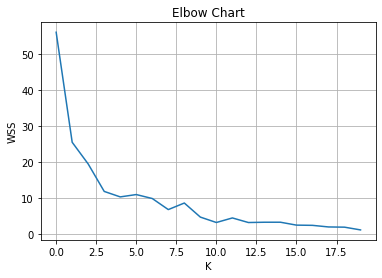

In [16]:

import matplotlib.pyplot as plt

X = temp_df
plt.plot(X['k'], X['WSS'])

plt.title('Elbow Chart')
plt.xlabel('K')
plt.ylabel('WSS')
plt.grid(True)

plt.show()

# local optimal k is 4,5, 7, 10
# optimal is 5

In [17]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 20

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(Clus_dataSet)
  labels = kmeans.labels_
  sil.append(silhouette_score(Clus_dataSet, labels, metric = 'euclidean'))

sil


[0.3797620286555018,
 0.27963183668005503,
 0.31213893435413725,
 0.25671113665211087,
 0.29615318631274495,
 0.2796125500968952,
 0.24369094568902955,
 0.2005914016627752,
 0.1980230670824381,
 0.20770491084731518,
 0.19901127455315867,
 0.22954613810585842,
 0.19827029846824354,
 0.21788496460677664,
 0.1952844490623306,
 0.1707675670197735,
 0.1710456012211328,
 0.14132699943217034,
 0.14300549997223944]

In [18]:
temp_df2 = pd.DataFrame(sil)

temp_df2['Sil'] = temp_df2[0]

temp_df2['k'] = temp_df2.index

temp_df2.drop(0, axis=1)

temp_df2

,0,Sil,k
0,0.379762,0.379762,0
1,0.279632,0.279632,1
2,0.312139,0.312139,2
3,0.256711,0.256711,3
4,0.296153,0.296153,4
5,0.279613,0.279613,5
6,0.243691,0.243691,6
7,0.200591,0.200591,7
8,0.198023,0.198023,8
9,0.207705,0.207705,9


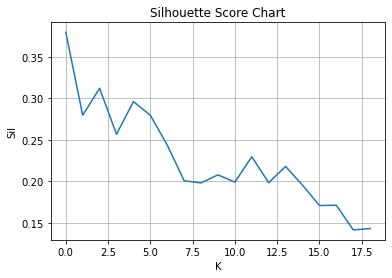

In [19]:


X = temp_df2
plt.plot(X['k'], X['Sil'])

plt.title('Silhouette Score Chart')
plt.xlabel('K')
plt.ylabel('Sil')
plt.grid(True)

plt.show()

# local optimal k is 3, 9, (13)
# optimal is 3

In [20]:
# Gap Statistic for K means
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic 
    Params:
        data: ndarry of shape (n_samples, n_features)
        nrefs: number of sample reference datasets to create
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters)):
# Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
# For n references, generate random sample and perform kmeans getting resulting dispersion of each loop
        for i in range(nrefs):
            
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
# Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
# Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
# Assign this loop's gap statistic to gaps
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)
        
    return (gaps.argmax() + 1, resultsdf)



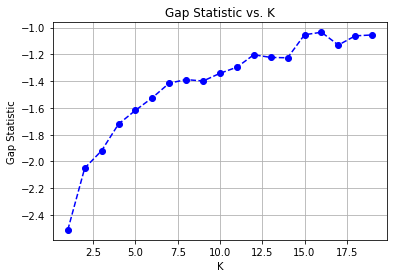

In [21]:
score_g, df = optimalK(Clus_dataSet, nrefs=5, maxClusters=20)

plt.plot(df['clusterCount'], df['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');
plt.grid(True)

plt.show()

# local optimal k is 8, 11, 14
# optimal is 19

In [ ]:
# Elbow method
# local optimal k is 4,5, 7, 10
# optimal is 5

# Silhouette method
# local optimal k is 3, 9, (13)
# optimal is 3

# Gap statistic method
# local optimal k is 8, 11, 14
# optimal is 19


### decide on elbow method optimal value of k = 5, across 3 methods above
### 3 cluster is too little for market segmentation, while 8 and above seems too many (for 28 neighbourhoods)


In [22]:
# set number of clusters

kclusters = 5


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Clus_dataSet)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 4, 3, 4, 1, 2, 3, 2, 1, 3], dtype=int32)

In [23]:
#area_features_df2 = area_features_df2.drop(1)


area_features_df2

,area_name,area_region,Latitude,Longitude,university,secondary_and_below,post_secondary_and_diploma,below_sgd_1999,sgd_1999_to_6999,sgd_7000_to_17499,sgd_17500_above,age_55_64,age_65_79,age_80_above,Total_DayCare,Total_ActiveCentre
0,BUKIT MERAH,CENTRAL REGION,1.270439,103.828318,2400.0,16600.0,4500.0,19000.0,13300.0,15800.0,7000.0,22660.0,22100.0,6550.0,5.0,22.0
1,BUKIT PANJANG,WEST REGION,1.379149,103.761413,3000.0,21700.0,6300.0,4500.0,12200.0,18600.0,6000.0,18560.0,9930.0,2300.0,0.0,2.0
2,BUKIT TIMAH,CENTRAL REGION,1.354690,103.776372,2500.0,10800.0,2400.0,3900.0,1600.0,5700.0,12500.0,9880.0,8190.0,2210.0,0.0,1.0
3,CHOA CHU KANG,WEST REGION,1.385317,103.744325,5000.0,27200.0,9400.0,5000.0,14600.0,23300.0,6300.0,21740.0,10860.0,2470.0,2.0,8.0
4,CLEMENTI,WEST REGION,1.315100,103.765231,1700.0,9900.0,2000.0,6600.0,8300.0,9900.0,5600.0,13180.0,12150.0,2680.0,5.0,7.0
5,HOUGANG,NORTH-EAST REGION,1.370801,103.892544,6100.0,29100.0,8500.0,9900.0,20600.0,23900.0,10000.0,34330.0,21470.0,5390.0,5.0,4.0
6,JURONG EAST,WEST REGION,1.333108,103.742294,1800.0,10600.0,2700.0,4000.0,8300.0,9700.0,3400.0,13440.0,8810.0,1800.0,2.0,3.0
7,JURONG WEST,WEST REGION,1.339636,103.707339,5600.0,43700.0,11500.0,11600.0,24900.0,36700.0,8600.0,34970.0,19620.0,3490.0,3.0,9.0
8,KALLANG,CENTRAL REGION,1.310759,103.866262,1500.0,10600.0,3100.0,8800.0,10700.0,11500.0,5500.0,14900.0,13410.0,3940.0,6.0,8.0
9,NOVENA,CENTRAL REGION,1.320526,103.843881,1000.0,5800.0,1100.0,2800.0,3500.0,4500.0,5100.0,6220.0,5430.0,1910.0,3.0,3.0


In [24]:
# add clustering labels
area_features_df2.insert(0, 'Cluster Labels', kmeans.labels_)

area_features_df2.head() # check the last columns!

,Cluster Labels,area_name,area_region,Latitude,Longitude,university,secondary_and_below,post_secondary_and_diploma,below_sgd_1999,sgd_1999_to_6999,sgd_7000_to_17499,sgd_17500_above,age_55_64,age_65_79,age_80_above,Total_DayCare,Total_ActiveCentre
0,0,BUKIT MERAH,CENTRAL REGION,1.270439,103.828318,2400.0,16600.0,4500.0,19000.0,13300.0,15800.0,7000.0,22660.0,22100.0,6550.0,5.0,22.0
1,4,BUKIT PANJANG,WEST REGION,1.379149,103.761413,3000.0,21700.0,6300.0,4500.0,12200.0,18600.0,6000.0,18560.0,9930.0,2300.0,0.0,2.0
2,3,BUKIT TIMAH,CENTRAL REGION,1.354690,103.776372,2500.0,10800.0,2400.0,3900.0,1600.0,5700.0,12500.0,9880.0,8190.0,2210.0,0.0,1.0
3,4,CHOA CHU KANG,WEST REGION,1.385317,103.744325,5000.0,27200.0,9400.0,5000.0,14600.0,23300.0,6300.0,21740.0,10860.0,2470.0,2.0,8.0
4,1,CLEMENTI,WEST REGION,1.315100,103.765231,1700.0,9900.0,2000.0,6600.0,8300.0,9900.0,5600.0,13180.0,12150.0,2680.0,5.0,7.0


In [25]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(area_features_df2['Latitude'], area_features_df2['Longitude'], area_features_df2['area_name'], area_features_df2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<H1> Analyze Clusters

In [26]:
area_features_df2.groupby('Cluster Labels').mean()

,Latitude,Longitude,university,secondary_and_below,post_secondary_and_diploma,below_sgd_1999,sgd_1999_to_6999,sgd_7000_to_17499,sgd_17500_above,age_55_64,age_65_79,age_80_above,Total_DayCare,Total_ActiveCentre
Cluster Labels,,,,,,,,,,,,,,
0,1.320260,103.838921,2900.000000,19750.000000,5000.000000,17600.000000,16150.000000,17500.000000,7550.000000,24720.000000,22480.000000,6050.000000,4.500000,17.000000
1,1.320637,103.841335,2516.666667,11800.000000,3233.333333,8683.333333,10383.333333,11900.000000,6050.000000,16131.666667,13868.333333,3943.333333,4.166667,7.333333
2,1.347267,103.868418,6775.000000,35500.000000,10600.000000,12750.000000,23875.000000,30875.000000,12150.000000,38280.000000,23937.500000,5680.000000,4.000000,7.250000
3,1.345023,103.832638,1533.333333,8511.111111,1855.555556,3022.222222,4566.666667,7544.444444,4877.777778,8057.777778,5944.444444,1590.000000,1.000000,2.222222
4,1.392108,103.817331,4042.857143,27428.571429,8514.285714,6457.142857,16700.000000,23514.285714,6657.142857,22511.428571,11958.571429,2710.000000,2.000000,5.857143


In [27]:
import plotly.graph_objects as go

In [29]:

fig = go.Figure(data=
    go.Parcoords(
        #line = dict(color = area_features_df2['Cluster Labels']),
        line = dict(color = area_features_df2['Cluster Labels'],
        #line = dict(color = df['species_id'],
                   #colorscale = [[0,'purple'],[0.25,'algae'],[0.5,'blue'],[0.75,'tealrose'],[1,'twilight']] ),                   
        #           colorscale = [[0,'purple'],[0.5,'lightseagreen'],[1,'gold']]), 
                    colorscale = [[0,'red'],[0.2,'purple'],[0.4,'blue'],[0.6,'green'],[1,'yellow']]),                    
                   #colorscale = 'Electric',
                   #showscale = True,
                   #cmin = 0,
                   #cmax = 50000),
        dimensions = list([
            dict(range = [0,50000],
                 label = 'Secondary_and_below', values = area_features_df2['secondary_and_below']),
            dict(range = [0,50000],
                 label = 'Post_secondary_and_diploma', values = area_features_df2['post_secondary_and_diploma']),
            dict(range = [0,50000],
                 label = "University", values = area_features_df2['university']),
            
            dict(range = [0,50000],                 
                 label = 'Below_sgd_1999', values = area_features_df2['below_sgd_1999']),
            dict(range = [0,50000],                 
                 label = 'Sgd_1999_to_6999', values = area_features_df2['sgd_1999_to_6999']),
            dict(range = [0,50000],                 
                 label = 'Sgd_7000_to_17499', values = area_features_df2['sgd_7000_to_17499']),
            dict(range = [0,50000],                 
                 label = 'Sgd_17500_above', values = area_features_df2['sgd_17500_above']),

            dict(range = [0,50000],                 
                 label = 'Age_55_64', values = area_features_df2['age_55_64']),
            dict(range = [0,50000],                 
                 label = 'Age_65_79', values = area_features_df2['age_65_79']),
            dict(range = [0,50000],                 
                 label = 'Age_80_above', values = area_features_df2['age_80_above']),

            dict(range = [0,30],                 
                 label = 'Total_DayCare', values = area_features_df2['Total_DayCare']),
            dict(range = [0,30],                 
                 label = 'Total_ActiveCentre', values = area_features_df2['Total_ActiveCentre']),

            ])
    )
)

fig.show()

In [31]:

# Create a data frame containing our centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=area_features_df3.columns)
centroids['cluster'] = centroids.index



In [32]:
#centroids.iloc[:,0]

#centroids['ClusterLabels'] = centroids.index

centroids

,university,secondary_and_below,post_secondary_and_diploma,below_sgd_1999,sgd_1999_to_6999,sgd_7000_to_17499,sgd_17500_above,age_55_64,age_65_79,age_80_above,Total_DayCare,Total_ActiveCentre,cluster
0,-0.165437,0.100495,-0.079804,2.114631,0.493989,0.103035,0.219075,0.550541,1.381485,1.531683,1.018666,2.416895,0
1,-0.364953,-0.596396,-0.567168,0.243121,-0.272224,-0.482325,-0.221171,-0.263118,0.139963,0.367993,0.839278,0.292957,1
2,1.851407,1.481128,1.465046,1.096670,1.520404,1.501107,1.569163,1.835216,1.591609,1.327301,0.749584,0.274647,2
3,-0.876754,-0.884697,-0.947250,-0.945083,-1.045080,-0.937606,-0.565215,-1.028039,-1.002405,-0.931952,-0.864905,-0.830045,3
4,0.429393,0.773593,0.889668,-0.224131,0.567067,0.731701,-0.042976,0.341301,-0.135363,-0.313281,-0.326742,-0.031388,4


In [34]:
fig = go.Figure(data=
    go.Parcoords(
        #line = dict(color = area_features_df2['Cluster Labels']),
        line = dict(color = centroids['cluster'],
        #line = dict(color = df['species_id'],
                   #colorscale = [[0,'purple'],[0.25,'algae'],[0.5,'blue'],[0.75,'tealrose'],[1,'twilight']] ),                   
                   #colorscale = [[0,'purple'],[0.5,'lightseagreen'],[1,'gold']]),  
                    colorscale = [[0,'red'],[0.2,'purple'],[0.4,'blue'],[0.6,'green'],[1,'yellow']]),                    
                   #colorscale = 'Electric',
                   #showscale = True,
                   #cmin = 0,
                   #cmax = 50000),
        dimensions = list([
            dict(range = [-3,3],
                 label = 'Secondary_and_below', values = centroids['secondary_and_below']),
            dict(range = [-3,3],
                 label = 'Post_secondary_and_diploma', values = centroids['post_secondary_and_diploma']),
            dict(range = [-3,3],
                 label = "University", values = centroids['university']),
            
            dict(range = [-3,3],                 
                 label = 'Below_sgd_1999', values = centroids['below_sgd_1999']),
            dict(range = [-3,3],                 
                 label = 'Sgd_1999_to_6999', values = centroids['sgd_1999_to_6999']),
            dict(range = [-3,3],                 
                 label = 'Sgd_7000_to_17499', values = centroids['sgd_7000_to_17499']),
            dict(range = [-3,3],                 
                 label = 'Sgd_17500_above', values = centroids['sgd_17500_above']),

            dict(range = [-3,3],                 
                 label = 'Age_55_64', values = centroids['age_55_64']),
            dict(range = [-3,3],                 
                 label = 'Age_65_79', values = centroids['age_65_79']),
            dict(range = [-3,3],                 
                 label = 'Age_80_above', values = centroids['age_80_above']),

            dict(range = [-3,3],                 
                 label = 'Total_DayCare', values = centroids['Total_DayCare']),
            dict(range = [-3,3],                 
                 label = 'Total_ActiveCentre', values = centroids['Total_ActiveCentre']),

            ])
    )
)

fig.show()

In [36]:
area_features_mean = area_features_df2.groupby('Cluster Labels').mean()
area_features_mean.drop(area_features_mean.loc[:,['Latitude', 'Longitude']], axis=1, inplace=True)

area_features_mean


,university,secondary_and_below,post_secondary_and_diploma,below_sgd_1999,sgd_1999_to_6999,sgd_7000_to_17499,sgd_17500_above,age_55_64,age_65_79,age_80_above,Total_DayCare,Total_ActiveCentre
Cluster Labels,,,,,,,,,,,,
0,2900.000000,19750.000000,5000.000000,17600.000000,16150.000000,17500.000000,7550.000000,24720.000000,22480.000000,6050.000000,4.500000,17.000000
1,2516.666667,11800.000000,3233.333333,8683.333333,10383.333333,11900.000000,6050.000000,16131.666667,13868.333333,3943.333333,4.166667,7.333333
2,6775.000000,35500.000000,10600.000000,12750.000000,23875.000000,30875.000000,12150.000000,38280.000000,23937.500000,5680.000000,4.000000,7.250000
3,1533.333333,8511.111111,1855.555556,3022.222222,4566.666667,7544.444444,4877.777778,8057.777778,5944.444444,1590.000000,1.000000,2.222222
4,4042.857143,27428.571429,8514.285714,6457.142857,16700.000000,23514.285714,6657.142857,22511.428571,11958.571429,2710.000000,2.000000,5.857143


In [40]:
fig = go.Figure(data=
    go.Parcoords(
        #line = dict(color = area_features_df2['Cluster Labels']),
        line = dict(color = area_features_mean.index,
        #line = dict(color = df['species_id'],
                   #colorscale = [[0,'purple'],[0.25,'algae'],[0.5,'blue'],[0.75,'tealrose'],[1,'twilight']] ),                   
                   #colorscale = [[0,'purple'],[0.5,'lightseagreen'],[1,'gold']]),  
                    colorscale = [[0,'red'],[0.2,'purple'],[0.4,'blue'],[0.6,'green'],[1,'yellow']]),                    
                   #colorscale = 'Electric',
                   #showscale = True,
                   #cmin = 0,
                   #cmax = 50000),
        dimensions = list([
            dict(range = [0,40000],
                 label = 'Secondary_and_below', values = area_features_mean['secondary_and_below']),
            dict(range = [0,40000],
                 label = 'Post_secondary_and_diploma', values = area_features_mean['post_secondary_and_diploma']),
            dict(range = [0,40000],
                 label = "University", values = area_features_mean['university']),
            
            dict(range = [0,40000],               
                 label = 'Below_sgd_1999', values = area_features_mean['below_sgd_1999']),
            dict(range = [0,40000],                 
                 label = 'Sgd_1999_to_6999', values = area_features_mean['sgd_1999_to_6999']),
            dict(range = [0,40000],                
                 label = 'Sgd_7000_to_17499', values = area_features_mean['sgd_7000_to_17499']),
            dict(range = [0,40000],                
                 label = 'Sgd_17500_above', values = area_features_mean['sgd_17500_above']),

            dict(range = [0,40000],                
                 label = 'Age_55_64', values = area_features_mean['age_55_64']),
            dict(range = [0,40000],                
                 label = 'Age_65_79', values = area_features_mean['age_65_79']),
            dict(range = [0,40000],                
                 label = 'Age_80_above', values = area_features_mean['age_80_above']),

            dict(range = [0,20],                 
                 label = 'Total_DayCare', values = area_features_mean['Total_DayCare']),
            dict(range = [0,20],                 
                 label = 'Total_ActiveCentre', values = area_features_mean['Total_ActiveCentre']),

            ])
    )
)

fig.show()

In [36]:
import plotly.express as px

#fig = px.scatter_matrix(area_features_df3)

fig = px.scatter_matrix(area_features_df2,
    dimensions=["university", "secondary_and_below", "post_secondary_and_diploma", "Total_DayCare", "Total_ActiveCentre"],
    color="Cluster Labels")

fig.show()



In [37]:
import plotly.express as px

#fig = px.scatter_matrix(area_features_df3)

fig = px.scatter_matrix(area_features_df2,
    dimensions=["below_sgd_1999", "sgd_1999_to_6999", "sgd_7000_to_17499", "sgd_17500_above", "Total_DayCare", "Total_ActiveCentre"],
    color="Cluster Labels")

fig.show()



In [38]:
import plotly.express as px

#fig = px.scatter_matrix(area_features_df3)

fig = px.scatter_matrix(area_features_df2,
    dimensions=["age_55_64", "age_65_79", "age_80_above", "Total_DayCare", "Total_ActiveCentre"],
    color="Cluster Labels")

fig.show()

